In [1]:
import pandas as pd

# Load the CSV file
file_path = '/content/Randomproduction_data.csv'  # Update this to the path of your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to inspect it
print(df.head())


                                                                                                                                                                                   Record_ID;Date;Cocoa_Roasting_Level;Sugar_Granularity;Milk_Solid_Percentage;Nuts_Inclusion_Rate;Texture_Smoothness;Sweetness_Level;Cocoa_Source_Check;Flavor_Infusion;Shelf_Life_Test;Seal_Integrity;Barcode_Scan_Success;Box_Dimensions;Label_Readability;Nutritional_Info_Accuracy;Chocolate_Glossiness;Status
WX1;07.08.2023;5 163574505;0 07;0 647463665;0 141156815;1821 319636;55740 59645;1 075330079;1 262623362;159 5459199;0 986545831;0 977265908;5 112267385;80 06945999;1293 963757;0                                      898881859;Okay                                                                                                                                                                                                                                                              
WX2;04.08.2023;2 957405898;0 07;

In [2]:
# Check for common delimiters if the default comma doesn't work
df = pd.read_csv(file_path, delimiter=';')
print(df.head())


  Record_ID        Date Cocoa_Roasting_Level Sugar_Granularity  \
0       WX1  07.08.2023          5,163574505              0,07   
1       WX2  04.08.2023          2,957405898              0,07   
2       WX3  05.08.2023          0,071302014              0,05   
3       WX4  07.08.2023          2,237458326              0,08   
4       WX5  03.08.2023          0,765161799              0,06   

  Milk_Solid_Percentage Nuts_Inclusion_Rate Texture_Smoothness  \
0           0,647463665         0,141156815        1821,319636   
1           0,601180098         0,279975881        1762,070866   
2           0,443866945         0,383971997         1520,03438   
3           0,508690093         0,842571283        1500,305535   
4           0,441458034         0,598622568         1710,83964   

  Sweetness_Level Cocoa_Source_Check Flavor_Infusion Shelf_Life_Test  \
0     55740,59645        1,075330079     1,262623362     159,5459199   
1     55333,46311        0,856113672     1,501980217     151,6

In [3]:
# Check data types
print(df.dtypes)

Record_ID                    object
Date                         object
Cocoa_Roasting_Level         object
Sugar_Granularity            object
Milk_Solid_Percentage        object
Nuts_Inclusion_Rate          object
Texture_Smoothness           object
Sweetness_Level              object
Cocoa_Source_Check           object
Flavor_Infusion              object
Shelf_Life_Test              object
Seal_Integrity               object
Barcode_Scan_Success         object
Box_Dimensions               object
Label_Readability            object
Nutritional_Info_Accuracy    object
Chocolate_Glossiness         object
Status                       object
dtype: object


the Object data type in pandas is usually considered a string. Based on the requirements sheet some of the columns should be turned to numeric

# **Data Preprocessing**

In [4]:
import pandas as pd

# Assuming 'date_column' is your date column name
df['Date'] = pd.to_datetime(df['Date'])


In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute
df['second'] = df['Date'].dt.second

df.drop('Date', axis=1, inplace=True)

In [6]:
# Convert non-numeric columns to numeric if possible
df['Record_ID'] = df['Record_ID'].str.extract('(\d+)').astype(int)


Now, we need to change the Status object so that it returns 1 if its 'okay' and 0 if 'not okay', since this model is a classification model.

In [7]:
import numpy as np
df['Status'] = np.where(df['Status'] == 'Okay', 1, 0)
print(df.head())

   Record_ID Cocoa_Roasting_Level Sugar_Granularity Milk_Solid_Percentage  \
0          1          5,163574505              0,07           0,647463665   
1          2          2,957405898              0,07           0,601180098   
2          3          0,071302014              0,05           0,443866945   
3          4          2,237458326              0,08           0,508690093   
4          5          0,765161799              0,06           0,441458034   

  Nuts_Inclusion_Rate Texture_Smoothness Sweetness_Level Cocoa_Source_Check  \
0         0,141156815        1821,319636     55740,59645        1,075330079   
1         0,279975881        1762,070866     55333,46311        0,856113672   
2         0,383971997         1520,03438     55149,53829        0,962238803   
3         0,842571283        1500,305535     55428,80619        1,132808444   
4         0,598622568         1710,83964     55045,09769        0,835508833   

  Flavor_Infusion Shelf_Life_Test  ... Nutritional_Info_Accura

So, to change the ratios to decimal or numeric value, i first tried to put them all in an array and loop around them. However, the Box_Dimensions, Flavor_Infusion and Nutritional_Info_Accuracy kept giving me an error, so I have decided to work on it first.

I ensured that the datatype of the Box_dimensions first was strings. Moreover, i checked and replaced non numeric values. And lastly i hchanged it to numeric and converted it to decimal by replacing the comma with a dot.

In [8]:
import pandas as pd

# Assuming df is already loaded

# List of specific columns to process
columns_to_process = ['Box_Dimensions', 'Flavor_Infusion', 'Nutritional_Info_Accuracy']

for column in columns_to_process:
    # Force the column to string type
    df[column] = df[column].astype(str)

    # Remove all non-numeric characters except the comma and negative sign
    df[column] = df[column].replace(r'[^0-9,\-]', '', regex=True)

    # Replace commas with dots to handle European decimal format correctly
    df[column] = df[column].str.replace(',', '.')

    # Convert the cleaned string to float, handling errors by converting to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Print and check the DataFrame to verify the changes
print(df[['Box_Dimensions', 'Flavor_Infusion', 'Nutritional_Info_Accuracy']].head())

   Box_Dimensions  Flavor_Infusion  Nutritional_Info_Accuracy
0        5.112267         1.262623                1293.963757
1        5.088393         1.501980                 310.202915
2        5.026650         1.297385               -1013.212906
3        5.150750         1.053271                1137.751886
4        5.116763         1.892861                 654.342394


In [9]:
import pandas as pd

# Define columns to exclude from the conversion process
exclude_columns = ['Box_Dimensions', 'Flavor_Infusion','Nutritional_Info_Accuracy','Date','Status','Record_ID']  # Add the name of the first column if it's known
first_column_name = df.columns[0]  # Dynamically get the name of the first column
exclude_columns.append(first_column_name)  # Append the first column to the exclude list

for column in df.columns:
    if column not in exclude_columns and df[column].dtype == 'object':  # Check column is not in the exclude list and is of type 'object'
        try:
            # Attempt to convert the column to float
            df[column] = df[column].str.replace(',', '.').replace(r'\.{2,}', '.', regex=True).astype(float)
        except ValueError as e:
            # Print any error that occurs during the conversion
            print(f"Conversion to float failed for column '{column}': {e}")


In [10]:
print(df.head())
print(df.dtypes)

   Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  Milk_Solid_Percentage  \
0          1              5.163575               0.07               0.647464   
1          2              2.957406               0.07               0.601180   
2          3              0.071302               0.05               0.443867   
3          4              2.237458               0.08               0.508690   
4          5              0.765162               0.06               0.441458   

   Nuts_Inclusion_Rate  Texture_Smoothness  Sweetness_Level  \
0             0.141157         1821.319636      55740.59645   
1             0.279976         1762.070866      55333.46311   
2             0.383972         1520.034380      55149.53829   
3             0.842571         1500.305535      55428.80619   
4             0.598623         1710.839640      55045.09769   

   Cocoa_Source_Check  Flavor_Infusion  Shelf_Life_Test  ...  \
0            1.075330         1.262623       159.545920  ...   
1           

In [11]:
print(df.shape)

(10000, 24)


In [12]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b72d2bed729008da536c330a09e0ced261e2b2e9845ed5e8ad592fd27f673171
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [13]:
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Now, Im going to check for null or missing values


In [14]:
#Preprocessing
#To check for missing values
print(df.isnull().sum())

Record_ID                    0
Cocoa_Roasting_Level         0
Sugar_Granularity            0
Milk_Solid_Percentage        0
Nuts_Inclusion_Rate          0
Texture_Smoothness           0
Sweetness_Level              0
Cocoa_Source_Check           0
Flavor_Infusion              0
Shelf_Life_Test              0
Seal_Integrity               0
Barcode_Scan_Success         0
Box_Dimensions               1
Label_Readability            0
Nutritional_Info_Accuracy    0
Chocolate_Glossiness         0
Status                       0
year                         0
month                        0
day                          0
weekday                      0
hour                         0
minute                       0
second                       0
dtype: int64


Since theres only one missing value and to ensure a really accurate number, im going to use correlation to predict it.

In [15]:
# Display rows where any cell is missing
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

      Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  \
3031       3032              0.207512               0.08   

      Milk_Solid_Percentage  Nuts_Inclusion_Rate  Texture_Smoothness  \
3031               0.754586              0.34246         1535.101726   

      Sweetness_Level  Cocoa_Source_Check  Flavor_Infusion  Shelf_Life_Test  \
3031      55943.18253             1.24945         1.669826        170.94208   

      ...  Nutritional_Info_Accuracy  Chocolate_Glossiness  Status  year  \
3031  ...                1054.193325              0.907168       1  2023   

      month  day  weekday  hour  minute  second  
3031      3    8        2     0       0       0  

[1 rows x 24 columns]


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_df.corr()


# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Assume 'target_variable' is the column with missing values
correlated_variable = corr_matrix['Box_Dimensions'].drop('Box_Dimensions').idxmax()
print(f"Most correlated variable with 'Box_Dimensions': {correlated_variable}")

# Filter out rows where the target or the highly correlated variable is missing
train_df = df.dropna(subset=['Box_Dimensions', correlated_variable])

# Prepare training data
X_train = train_df[[correlated_variable]]  # Predictor
y_train = train_df['Box_Dimensions']  # Target

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
missing_values = df[df['Box_Dimensions'].isnull()]
predicted_values = model.predict(missing_values[[correlated_variable]])

# Fill in the missing values in the original DataFrame
df.loc[df['Box_Dimensions'].isnull(), 'Box_Dimensions'] = predicted_values

# Verify changes
print("Updated DataFrame with predicted values:")
print(df.loc[df['Box_Dimensions'].isnull()])


Correlation Matrix:
                           Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  \
Record_ID                   1.000000              0.002220           0.012519   
Cocoa_Roasting_Level        0.002220              1.000000           0.000885   
Sugar_Granularity           0.012519              0.000885           1.000000   
Milk_Solid_Percentage      -0.019733             -0.014745           0.007847   
Nuts_Inclusion_Rate        -0.010844             -0.007613           0.010039   
Texture_Smoothness          0.011570             -0.008232          -0.024353   
Sweetness_Level            -0.004906             -0.010581          -0.016437   
Cocoa_Source_Check         -0.004626             -0.012269           0.011760   
Flavor_Infusion            -0.006944             -0.009926           0.005249   
Shelf_Life_Test             0.007455             -0.008631           0.009452   
Seal_Integrity             -0.001417              0.007564          -0.011730   
Barcode_

In [17]:
print(df.head())
#To check for missing values again
print(df.isnull().sum())

   Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  Milk_Solid_Percentage  \
0          1              5.163575               0.07               0.647464   
1          2              2.957406               0.07               0.601180   
2          3              0.071302               0.05               0.443867   
3          4              2.237458               0.08               0.508690   
4          5              0.765162               0.06               0.441458   

   Nuts_Inclusion_Rate  Texture_Smoothness  Sweetness_Level  \
0             0.141157         1821.319636      55740.59645   
1             0.279976         1762.070866      55333.46311   
2             0.383972         1520.034380      55149.53829   
3             0.842571         1500.305535      55428.80619   
4             0.598623         1710.839640      55045.09769   

   Cocoa_Source_Check  Flavor_Infusion  Shelf_Life_Test  ...  \
0            1.075330         1.262623       159.545920  ...   
1           

We fixed the missing value problem, now we will check for any duplicates.

In [18]:
# Check for duplicate rows
print("Duplicate entries:", df.duplicated().sum())

Duplicate entries: 0


Perfect. There are no duplicate rows.

We then, need to remove all negative values.

In [19]:

cols_to_convert = [col for col in df.columns]

# Convert the selected columns to their absolute values
df[cols_to_convert] = df[cols_to_convert].abs()

print(df)

      Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  \
0             1              5.163575               0.07   
1             2              2.957406               0.07   
2             3              0.071302               0.05   
3             4              2.237458               0.08   
4             5              0.765162               0.06   
...         ...                   ...                ...   
9995       9996              1.104636               0.06   
9996       9997              1.161185               0.07   
9997       9998              0.162407               0.08   
9998       9999              0.994343               0.07   
9999      10000              0.015013               0.08   

      Milk_Solid_Percentage  Nuts_Inclusion_Rate  Texture_Smoothness  \
0                  0.647464             0.141157         1821.319636   
1                  0.601180             0.279976         1762.070866   
2                  0.443867             0.383972         1520.0

In [20]:
# This function is to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")
v_counts(df)

Record_ID
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
_____________________________________________________________________________
Cocoa_Roasting_Level
5.163575    1
3.861467    1
0.494033    1
0.101273    1
0.859904    1
           ..
1.027226    1
0.027473    1
0.918948    1
0.621506    1
0.015013    1
Name: count, Length: 10000, dtype: int64
_____________________________________________________________________________
Sugar_Granularity
0.06    3390
0.07    3285
0.08    1673
0.05    1652
Name: count, dtype: int64
_____________________________________________________________________________
Milk_Solid_Percentage
0.647464    1
0.478377    1
0.460806    1
0.447870    1
0.632899    1
           ..
0.515515    1
0.526348    1
0.587933    1
0.195050    1
0.325719    1
Name: count, Length: 10000, dtype: int64
_________________________________________________________________

Now, we want to check for outliers. First of all, I want to check if my data is normalized or not in order to know which method i should use

<ipython-input-21-e124c179aedf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col[i], data=df, palette='Set2')
<ipython-input-21-e124c179aedf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col[i], data=df, palette='Set2')
<ipython-input-21-e124c179aedf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col[i], data=df, palette='Set2')
<ipython-input-21-e124c179aedf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

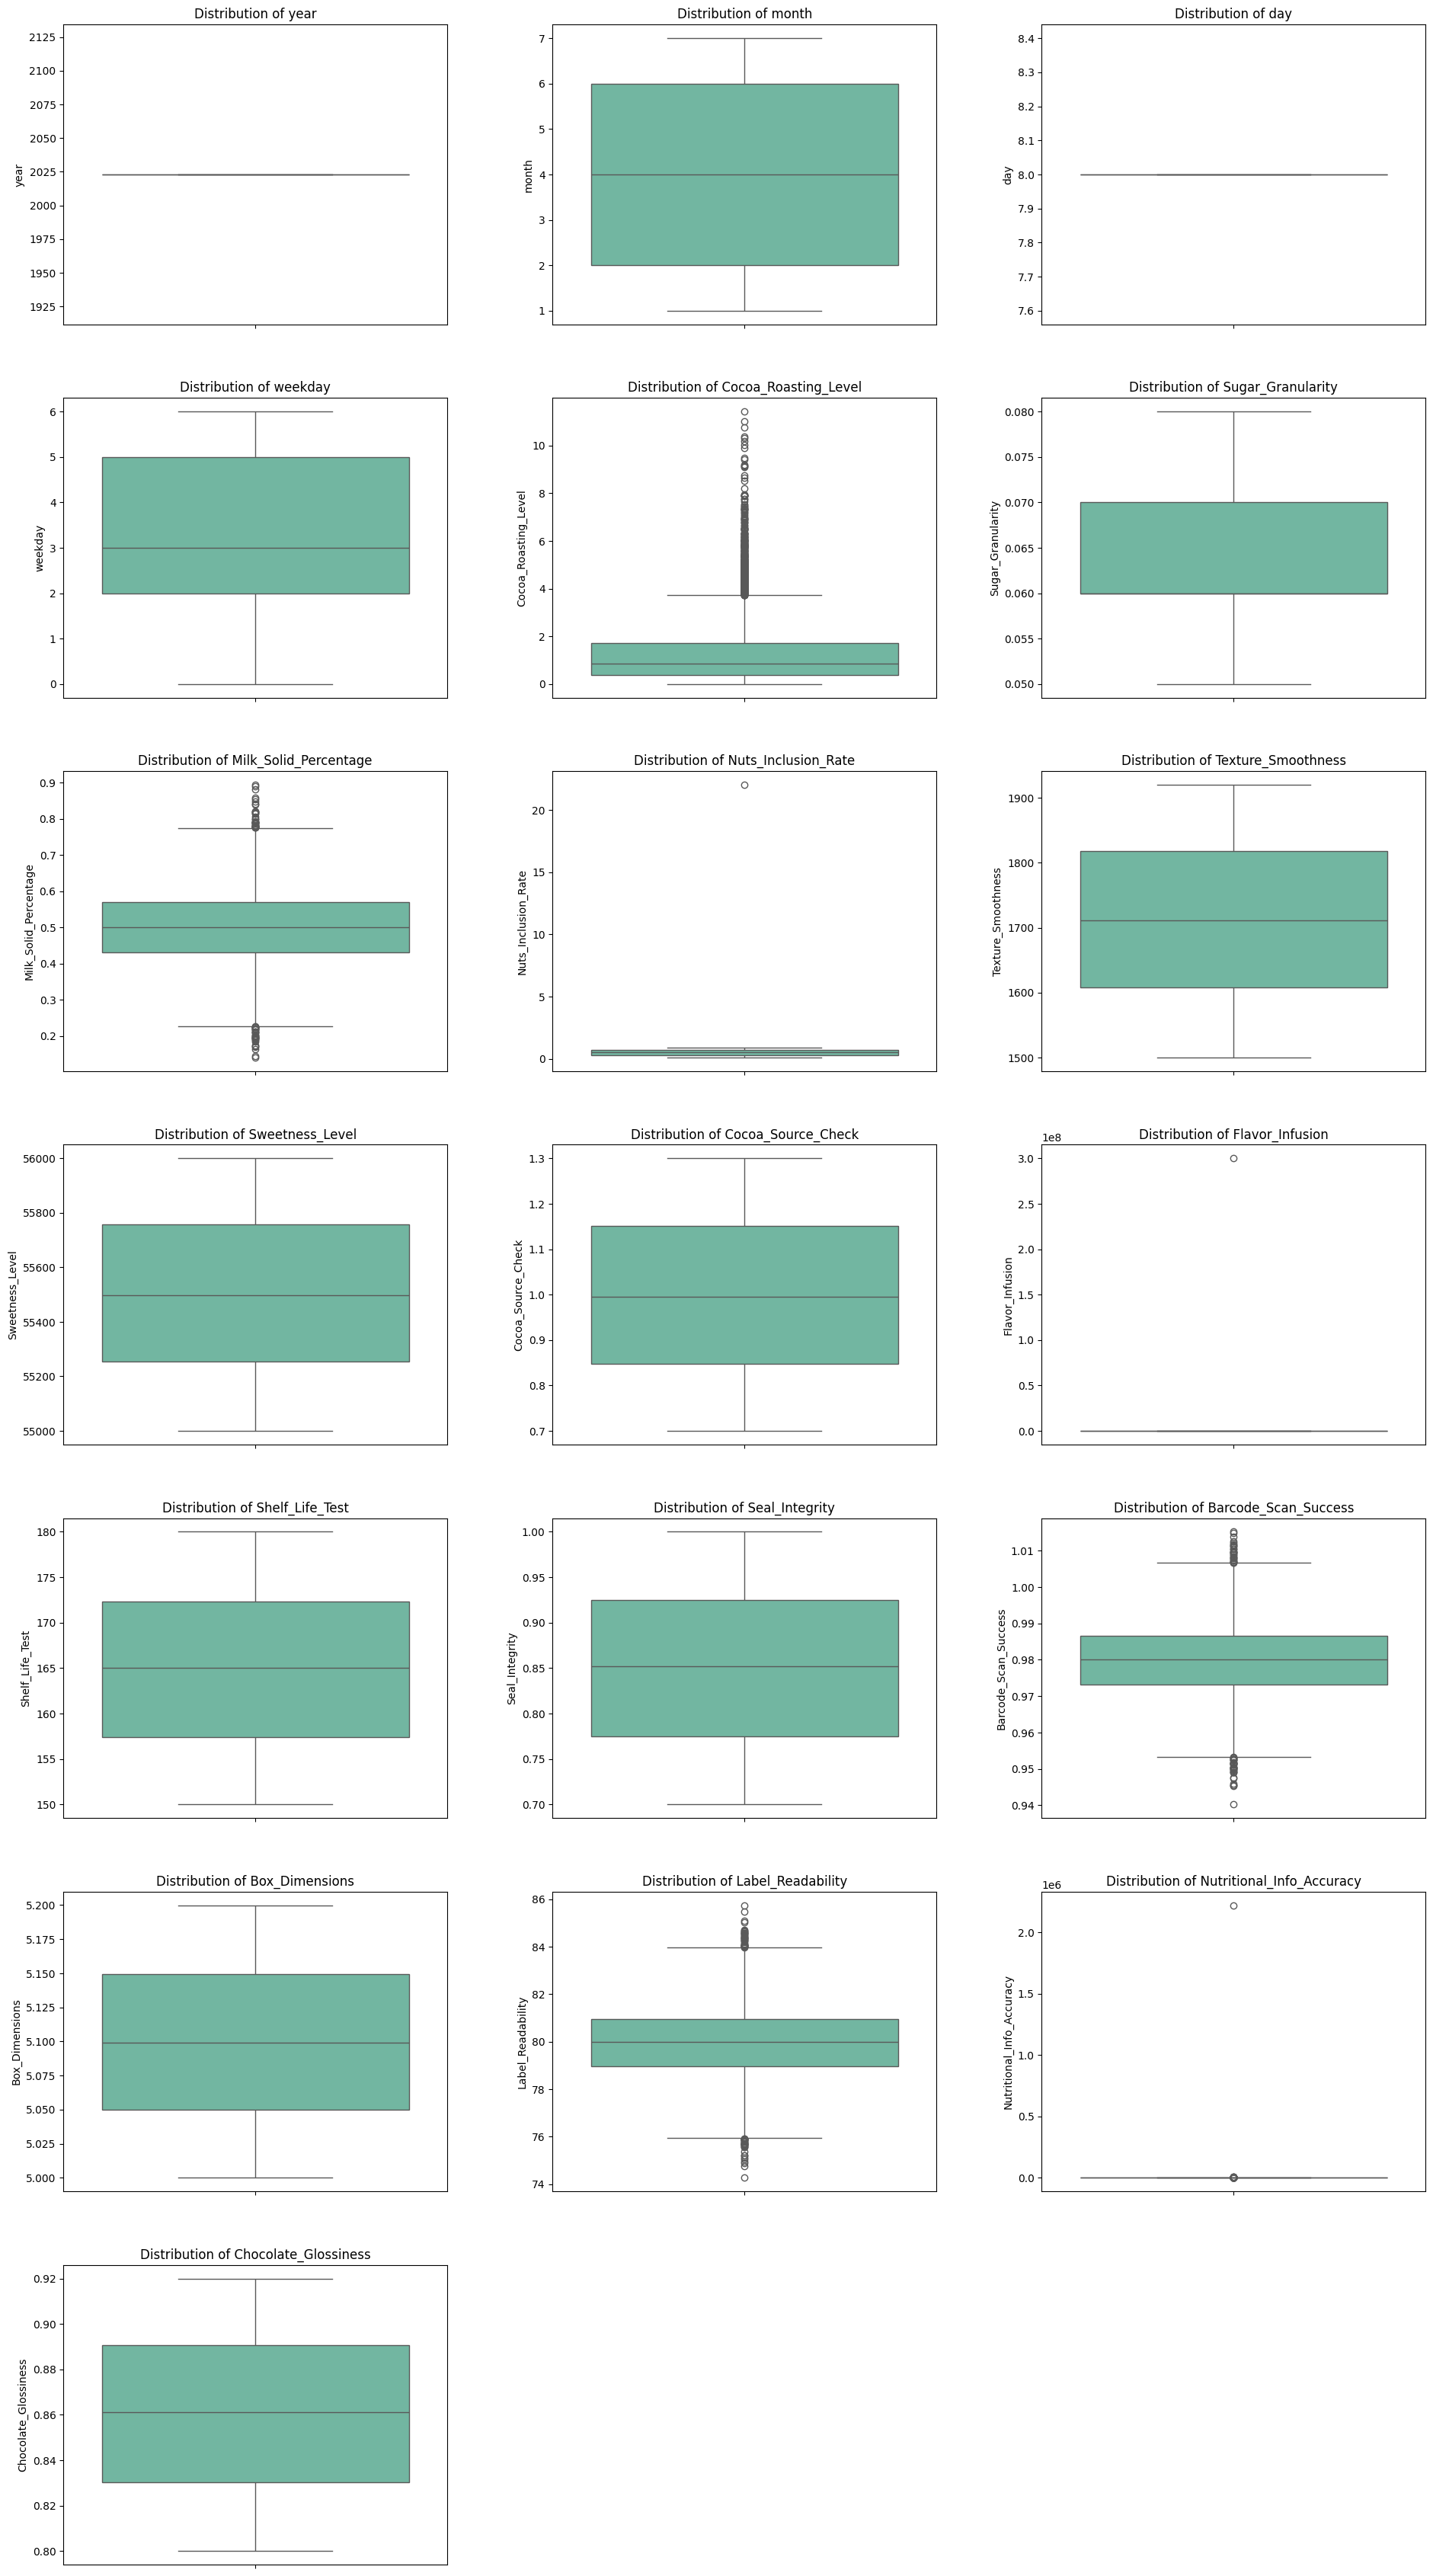

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define the columns to plot
col = ['year', 'month', 'day', 'weekday', 'Cocoa_Roasting_Level',
       'Sugar_Granularity', 'Milk_Solid_Percentage', 'Nuts_Inclusion_Rate', 'Texture_Smoothness',
       'Sweetness_Level', 'Cocoa_Source_Check', 'Flavor_Infusion', 'Shelf_Life_Test',
       'Seal_Integrity', 'Barcode_Scan_Success', 'Box_Dimensions', 'Label_Readability',
       'Nutritional_Info_Accuracy', 'Chocolate_Glossiness']

# Ensure you only create subplots for existing columns
num_columns = len(col)
num_rows = math.ceil(num_columns / 3)

plt.figure(figsize=(20, 5 * num_rows))  # Increase figure size to accommodate more plots

for i in range(num_columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot grid dynamically
    sns.boxplot(y=col[i], data=df, palette='Set2')
    plt.title(f'Distribution of {col[i]}')  # Optional: add title to each subplot
    plt.xlabel('')  # Remove x-label to reduce clutter

plt.tight_layout(pad=5.0)  # Adjust layout with padding to prevent overlap
plt.show()


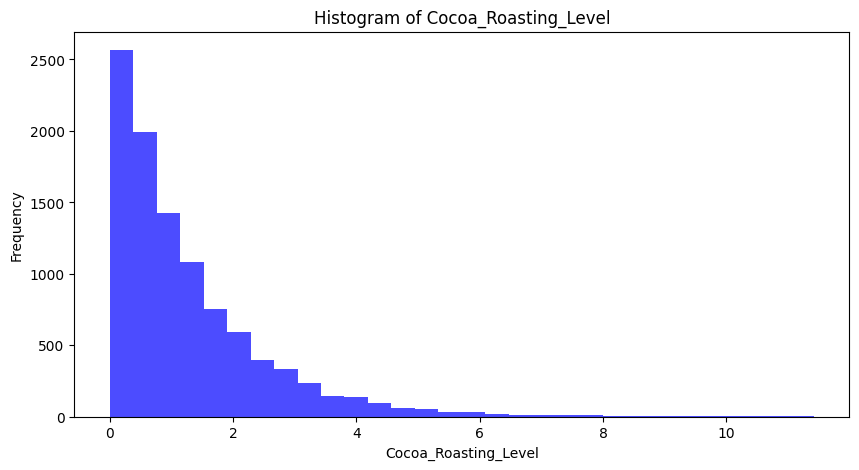

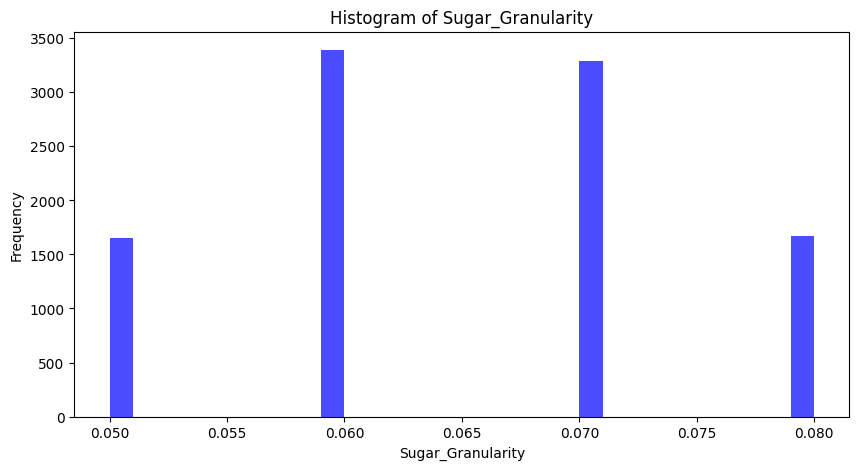

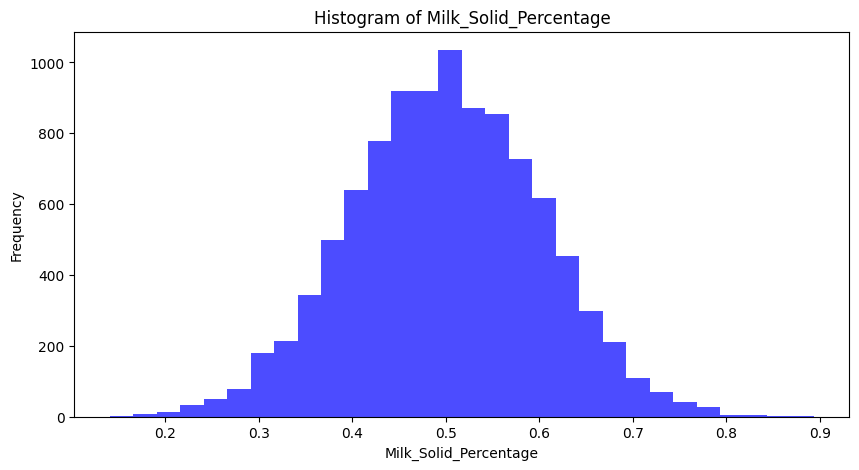

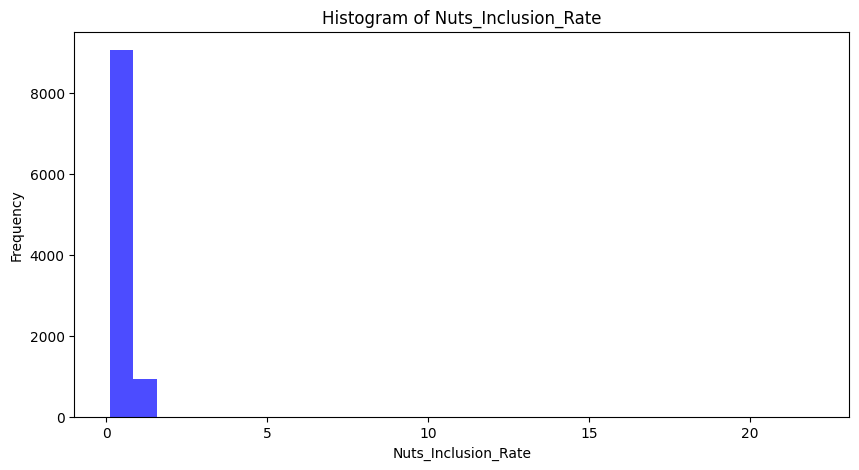

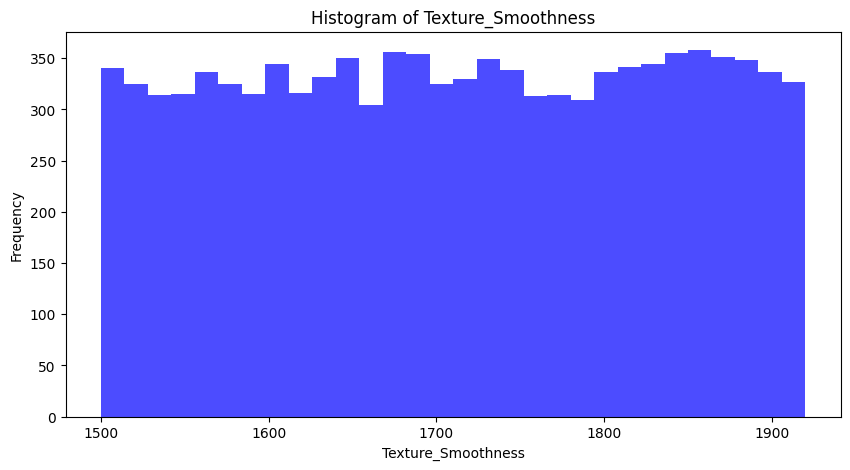

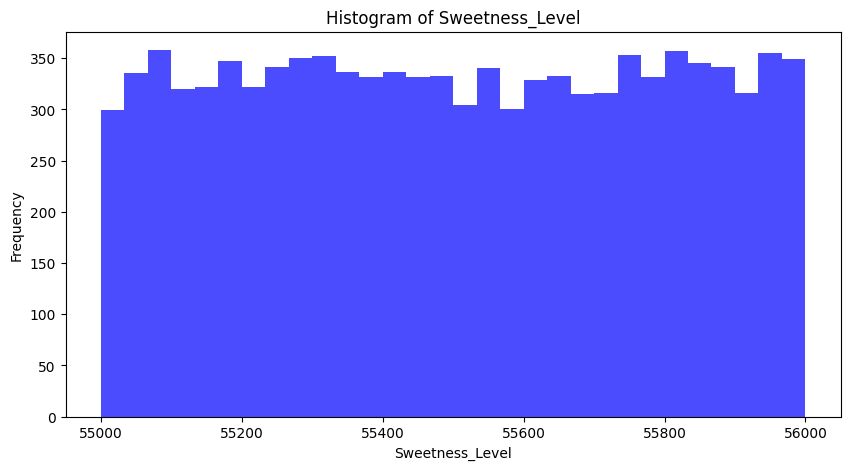

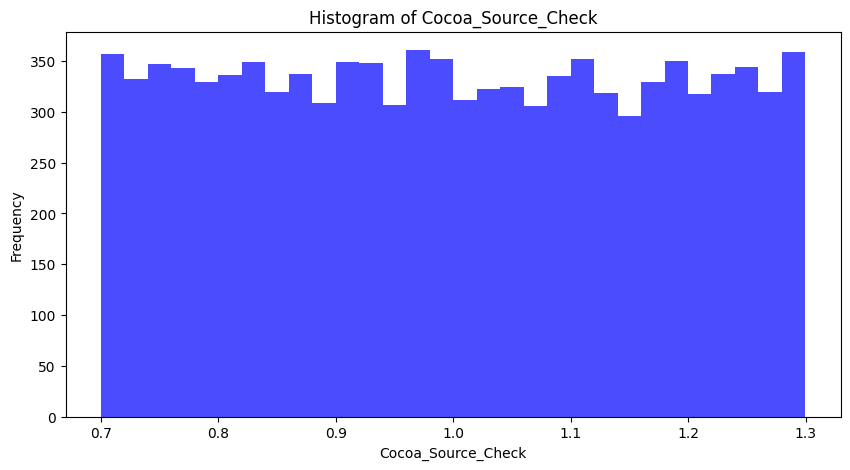

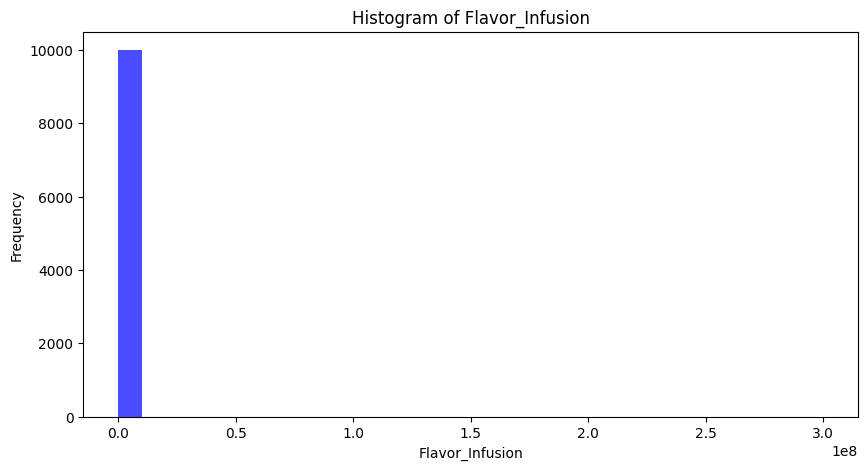

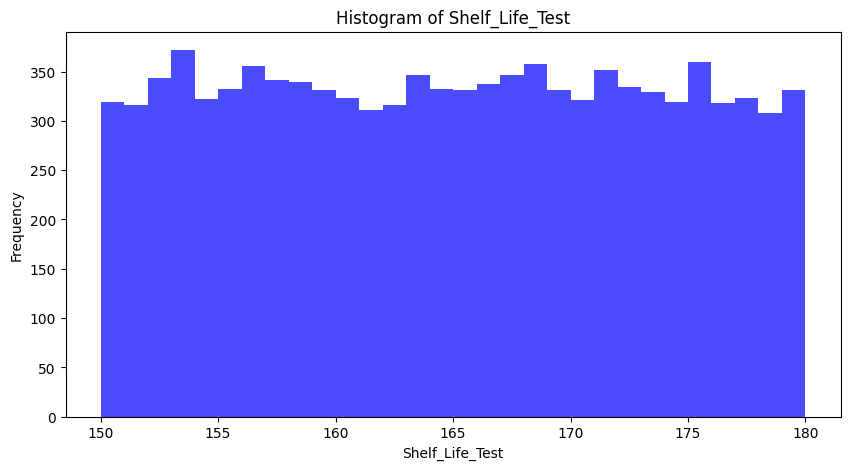

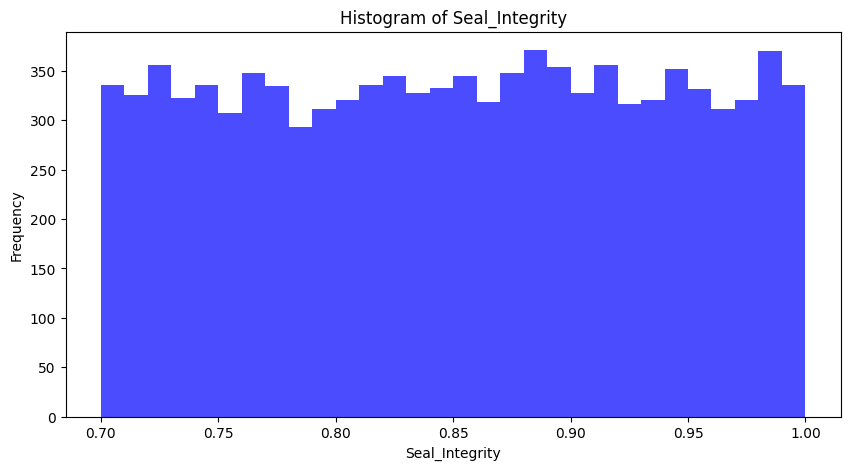

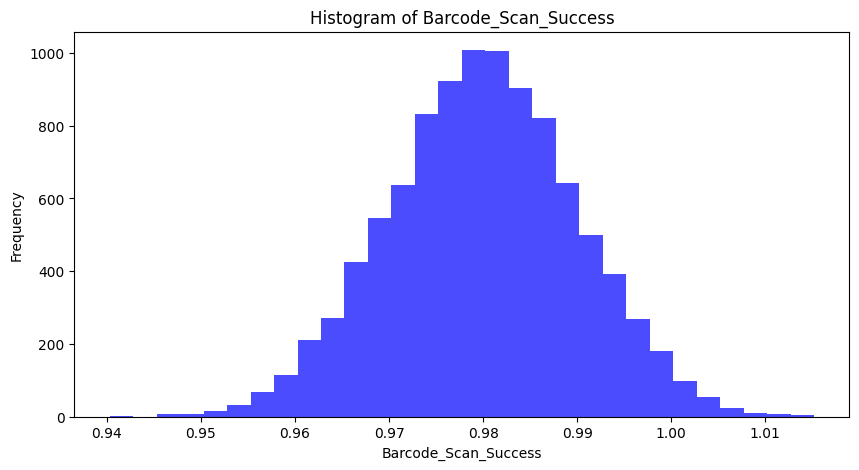

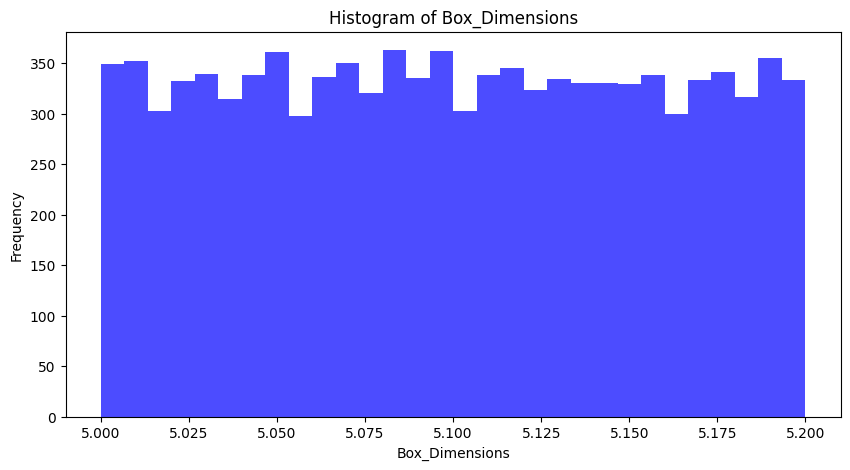

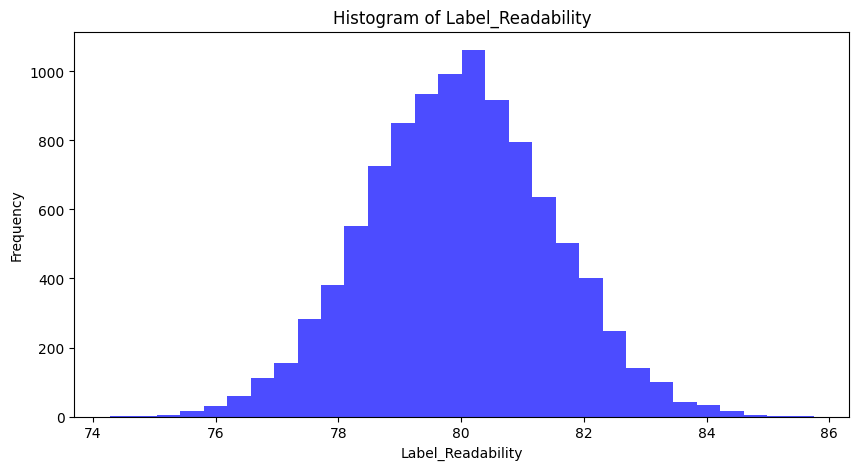

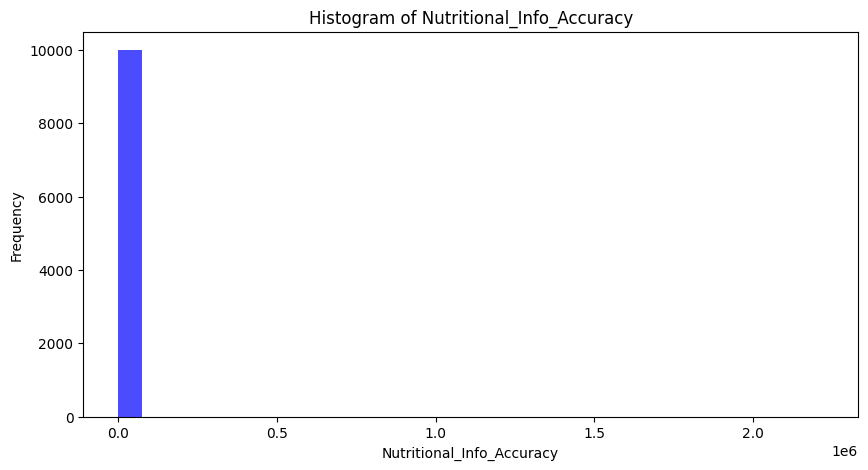

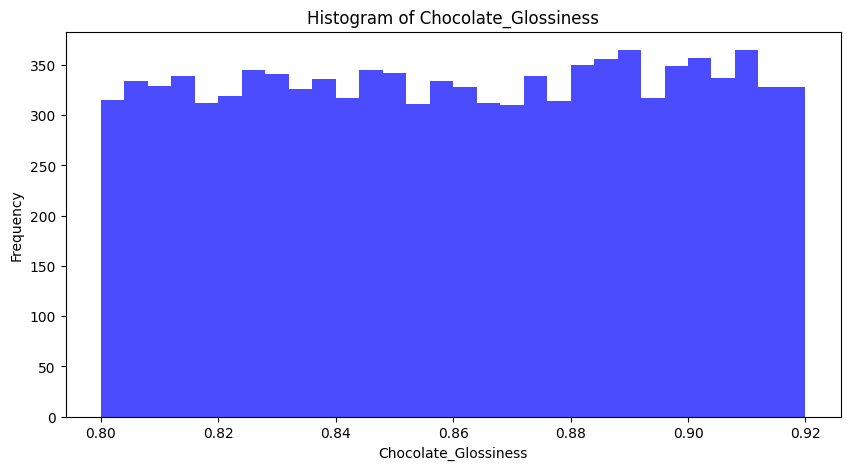

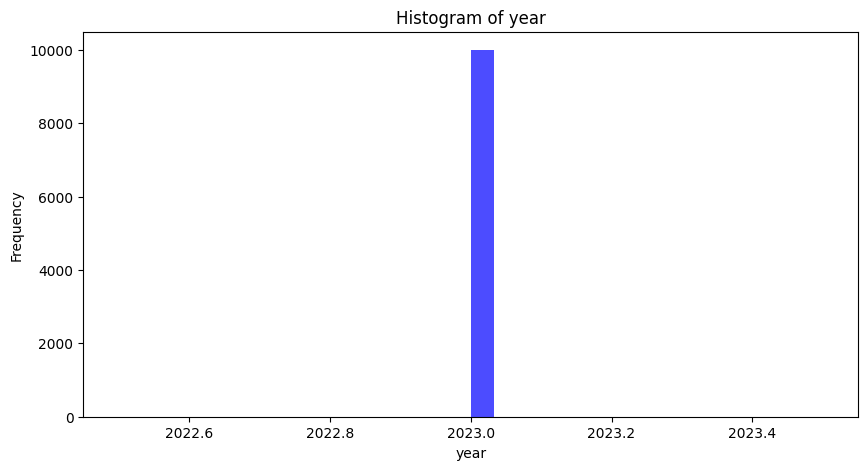

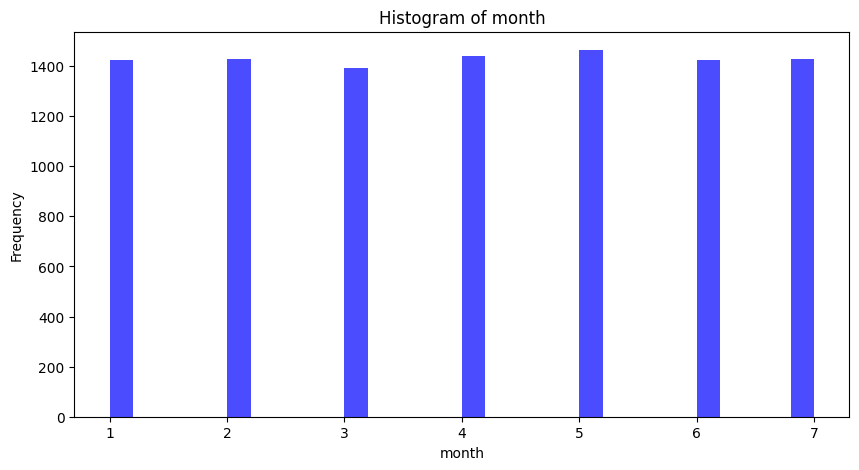

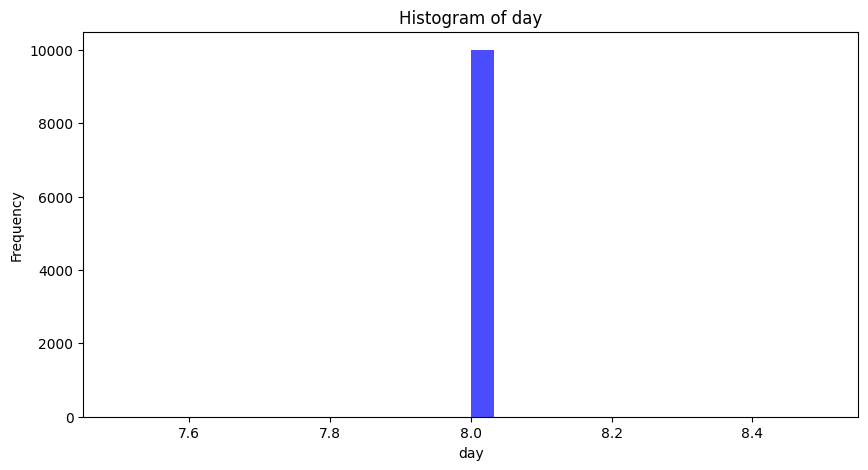

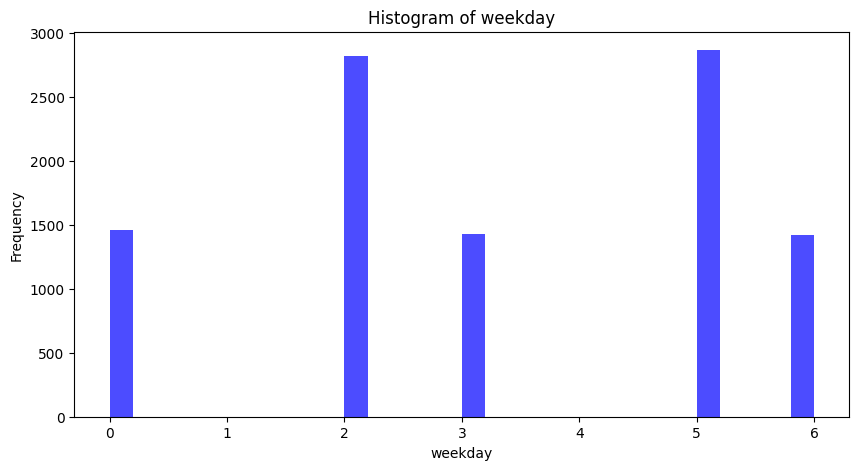

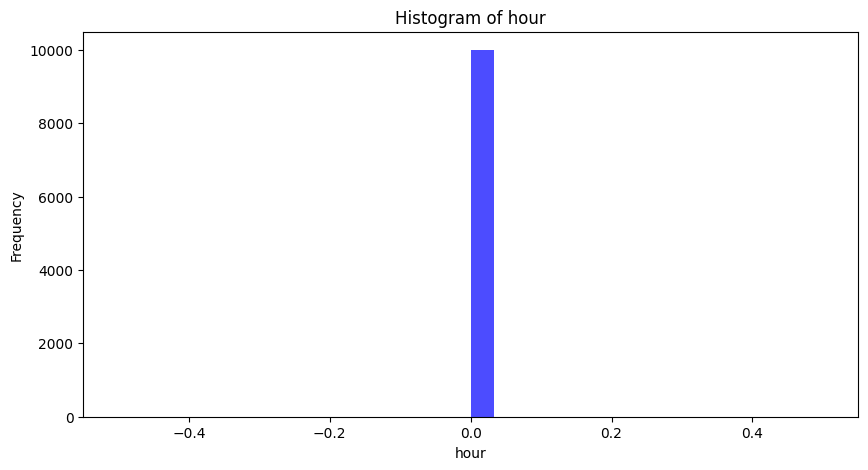

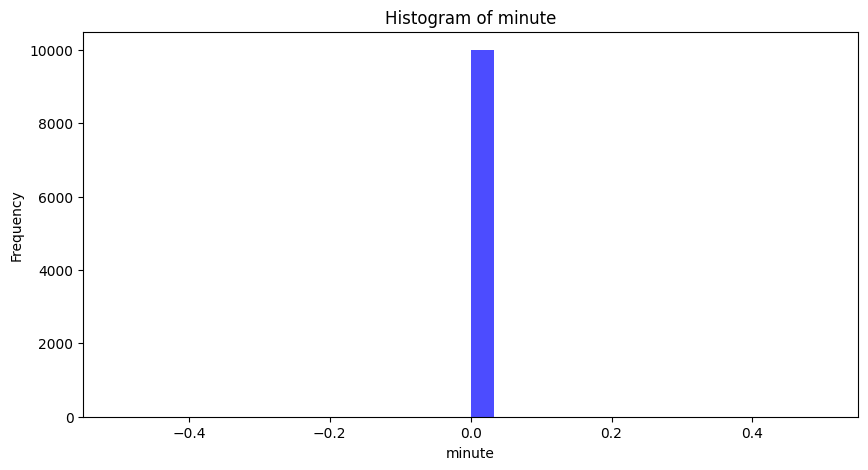

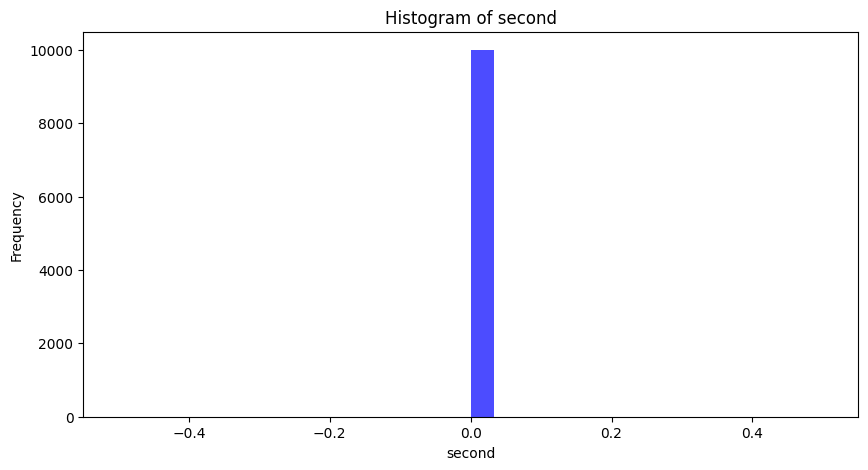

In [22]:
col = [ 'year', 'month',  'day' , 'weekday',  'hour',  'minute',  'second',  'Cocoa_Roasting_Level',  'Sugar_Granularity', 'Milk_Solid_Percentage',  'Nuts_Inclusion_Rate' ,'Texture_Smoothness', 'Sweetness_Level','Cocoa_Source_Check',  'Flavor_Infusion',  'Shelf_Life_Test', 'Seal_Integrity',  'Barcode_Scan_Success',  'Box_Dimensions',  'Label_Readability', 'Nutritional_Info_Accuracy',  'Chocolate_Glossiness']

import pandas as pd
import matplotlib.pyplot as plt
# Filtering numeric columns as histograms are meant for numeric data
numeric_cols = df.select_dtypes(include=['number']).columns

# Loop through the columns and plot histograms
for column in numeric_cols:
    if column in col:  # Check if the column is in the list of columns we care about
        plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
        plt.hist(df[column].dropna(), bins=30, alpha=0.7, color='blue')  # Drop NA values for plotting
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [23]:
import pandas as pd
from scipy.stats import shapiro

# Dictionary to hold the results
normality_results = {}

# Loop through the columns and perform Shapiro-Wilk test
for column in numeric_cols:
    if column in col:  # Ensure the column is in your list
        # Perform the Shapiro-Wilk test
        stat, p = shapiro(df[column].dropna())  # Drop NA values for the test
        normality_results[column] = p  # Store the p-value in the dictionary

# Print the results
print("P-values from Shapiro-Wilk Test for Normality:")
for column, p_value in normality_results.items():
    print(f"{column}: p-value = {p_value:.4f}")

# Optionally, determine if the data is normally distributed based on p-value
alpha = 0.05  # Significance level
for column, p_value in normality_results.items():
    if p_value > alpha:
        print(f"{column}: Data looks normal (fail to reject H0)")


P-values from Shapiro-Wilk Test for Normality:
Cocoa_Roasting_Level: p-value = 0.0000
Sugar_Granularity: p-value = 0.0000
Milk_Solid_Percentage: p-value = 0.7075
Nuts_Inclusion_Rate: p-value = 0.0000
Texture_Smoothness: p-value = 0.0000
Sweetness_Level: p-value = 0.0000
Cocoa_Source_Check: p-value = 0.0000
Flavor_Infusion: p-value = 0.0000
Shelf_Life_Test: p-value = 0.0000
Seal_Integrity: p-value = 0.0000
Barcode_Scan_Success: p-value = 0.3433
Box_Dimensions: p-value = 0.0000
Label_Readability: p-value = 0.9753
Nutritional_Info_Accuracy: p-value = 0.0000
Chocolate_Glossiness: p-value = 0.0000
year: p-value = 1.0000
month: p-value = 0.0000
day: p-value = 1.0000
weekday: p-value = 0.0000
hour: p-value = 1.0000
minute: p-value = 1.0000
second: p-value = 1.0000
Milk_Solid_Percentage: Data looks normal (fail to reject H0)
Barcode_Scan_Success: Data looks normal (fail to reject H0)
Label_Readability: Data looks normal (fail to reject H0)
year: Data looks normal (fail to reject H0)
day: Data 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Based on the pscore and the histograms, the columns that we can use zscore on are Label_Readablilty, Barcode_Scan_Success and Milk_Solid_Percentage.
The rest I will be using quantile to detect them.


I chose to use winsorizing to handle outliers because it allows for the reduction of their impact without removing any data points, thus preserving the integrity of the dataset. This method is particularly effective in reducing skewness and ensuring that statistical analyses are not disproportionately influenced by extreme values. Winsorizing provides a controlled, easily implementable way to adjust outliers by capping them at specified percentiles, which enhances the robustness of statistical estimates and maintains the overall data structure. This makes it a practical choice for datasets where retaining all data points is crucial and for ensuring the accuracy of statistical measures.

In [24]:
import pandas as pd
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

columns= [ 'Label_Readability', 'Barcode_Scan_Success', 'Milk_Solid_Percentage']

# Function to detect and handle outliers using Z-score and winsorize
def handle_outliers_zscore_winsorize(df, column, z_thresh=3, limits=(0.05, 0.05)):
    # Calculate Z-scores
    z_scores = zscore(df[column])

    # Identify outliers
    outliers = df[(z_scores > z_thresh) | (z_scores < -z_thresh)]

    # Display initial outliers
    print(f"Initial outliers detected using Z-score in {column}:")
    print(outliers)

    # Apply winsorizing to the column to limit outliers
    df[column] = winsorize(df[column], limits=limits)

    return df
for column_name in columns:
  print(f"\n--- Processing {column_name} ---")
  df = handle_outliers_zscore_winsorize(df, column_name)



--- Processing Label_Readability ---
Initial outliers detected using Z-score in Label_Readability:
      Record_ID  Cocoa_Roasting_Level  Sugar_Granularity  \
255         256              0.162074               0.08   
543         544              1.633019               0.07   
1275       1276              0.432549               0.05   
1365       1366              0.747414               0.05   
1702       1703              0.203950               0.06   
2123       2124              1.570255               0.07   
3191       3192              0.629151               0.05   
3300       3301              0.060601               0.06   
3472       3473              0.038452               0.07   
4304       4305              1.738617               0.05   
4727       4728              1.716606               0.07   
4938       4939              1.579050               0.07   
5193       5194              2.312694               0.06   
5266       5267              0.238286               0.08   


In [25]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import logging
import sys

# Clear any existing logging handlers if running multiple times in Colab
logger = logging.getLogger()
while logger.handlers:
    logger.handlers.pop()

# Configure logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

import numpy as np

def manual_winsorize(array, limits):
    # Calculate the quantiles
    lower_quantile = np.percentile(array, limits[0] * 100)
    upper_quantile = np.percentile(array, (1 - limits[1]) * 100)
    # Clip the values in the array based on these quantiles
    array_clipped = np.clip(array, lower_quantile, upper_quantile)
    return array_clipped

def apply_winsorizing_with_logging(df, column):
    logging.info(f"Starting to process {column}")
    data = df[column].dropna().astype(float)
    logging.debug(f"Data after dropping NaNs and conversion: {data.head()}")

    data_array = data.to_numpy()
    Q1 = np.percentile(data_array, 25)
    Q3 = np.percentile(data_array, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    logging.debug(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    logging.debug(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

    winsorized_data = manual_winsorize(data_array, limits=(0.05, 0.05))
    logging.debug(f"Data type before winsorizing: {type(data_array)}")
    logging.debug(f"Any masked values: {np.any(np.ma.is_masked(data_array))}")
    df.loc[df[column].notna(), column] = winsorized_data

    logging.info(f"Completed processing {column}")
    return df





col2 = [ 'Cocoa_Roasting_Level',  'Sugar_Granularity',  'Nuts_Inclusion_Rate' ,'Texture_Smoothness', 'Sweetness_Level','Cocoa_Source_Check',  'Flavor_Infusion',  'Shelf_Life_Test', 'Seal_Integrity',    'Box_Dimensions',  'Nutritional_Info_Accuracy',  'Chocolate_Glossiness']
print(df[col2].dtypes)
for column in col2:
    print(f"Handling outliers in {column} using winsorizing:")
    df = apply_winsorizing_with_logging(df, column)
    print(df[column].describe())

Cocoa_Roasting_Level         float64
Sugar_Granularity            float64
Nuts_Inclusion_Rate          float64
Texture_Smoothness           float64
Sweetness_Level              float64
Cocoa_Source_Check           float64
Flavor_Infusion              float64
Shelf_Life_Test              float64
Seal_Integrity               float64
Box_Dimensions               float64
Nutritional_Info_Accuracy    float64
Chocolate_Glossiness         float64
dtype: object
Handling outliers in Cocoa_Roasting_Level using winsorizing:
2024-07-06 22:39:41,081 - INFO - Starting to process Cocoa_Roasting_Level
2024-07-06 22:39:41,086 - DEBUG - Data after dropping NaNs and conversion: 0    5.163575
1    2.957406
2    0.071302
3    2.237458
4    0.765162
Name: Cocoa_Roasting_Level, dtype: float64
2024-07-06 22:39:41,091 - DEBUG - Q1: 0.37044388, Q3: 1.7129732985000001, IQR: 1.3425294185
2024-07-06 22:39:41,098 - DEBUG - Lower bound: -1.6433502477500002, Upper bound: 3.7267674262500003
2024-07-06 22:39:41,103 - D

I had the problem that after winsorizing there is a masked array. After adding the logs to check were the problem was coming from, I ensured that there is no missing or duplicate data and the dataset is numpy, moreover, then, i wrote my own winsorizing function because I was skeptical that the original from scipy.stats.mstats was the reason behind the issues.
After checking everything and ensuring that this isnt affecting my data or the winsorizing of the outliers, ive decided to ignore these warnings.

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Column to exclude
exclude_column = 'Record_ID'

# Columns to normalize (all except the excluded column)
columns_to_normalize = df.columns.difference([exclude_column])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data for the selected columns
df1 = pd.DataFrame(scaler.fit_transform(df[columns_to_normalize]), columns=columns_to_normalize)

# Add the excluded column back to the DataFrame
df1[exclude_column] = df[exclude_column].values

# Display the normalized data
print("Normalized Data:")
print(df1)

Normalized Data:
      Barcode_Scan_Success  Box_Dimensions  Chocolate_Glossiness  \
0                 0.420806        0.569098              0.860461   
1                 0.607361        0.436931              0.000000   
2                 0.512248        0.095128              0.912769   
3                 0.474905        0.782133              0.173837   
4                 0.664094        0.593987              0.952104   
...                    ...             ...                   ...   
9995              0.000000        0.922221              0.842512   
9996              0.733942        0.394040              0.141675   
9997              0.283334        0.000000              0.021327   
9998              0.686385        0.775199              0.674198   
9999              0.627932        0.000000              0.350441   

      Cocoa_Roasting_Level  Cocoa_Source_Check  Flavor_Infusion  \
0                 1.000000            0.639760         0.233705   
1                 0.785813      

In [27]:
# Check if the columns exist before dropping
if 'hour' in df1.columns:
    df1 = df1.drop('hour', axis=1)  # Specify axis=1 to drop a column
if 'minute' in df1.columns:
    df1 = df1.drop('minute', axis=1)
if 'second' in df1.columns:
    df1 = df1.drop('second', axis=1)

In [28]:
print(df1.dtypes)

Barcode_Scan_Success         float64
Box_Dimensions               float64
Chocolate_Glossiness         float64
Cocoa_Roasting_Level         float64
Cocoa_Source_Check           float64
Flavor_Infusion              float64
Label_Readability            float64
Milk_Solid_Percentage        float64
Nutritional_Info_Accuracy    float64
Nuts_Inclusion_Rate          float64
Seal_Integrity               float64
Shelf_Life_Test              float64
Status                       float64
Sugar_Granularity            float64
Sweetness_Level              float64
Texture_Smoothness           float64
day                          float64
month                        float64
weekday                      float64
year                         float64
Record_ID                      int64
dtype: object


In [29]:
print(df1.head())
#To check for missing values again
print(df1.isnull().sum())

   Barcode_Scan_Success  Box_Dimensions  Chocolate_Glossiness  \
0              0.420806        0.569098              0.860461   
1              0.607361        0.436931              0.000000   
2              0.512248        0.095128              0.912769   
3              0.474905        0.782133              0.173837   
4              0.664094        0.593987              0.952104   

   Cocoa_Roasting_Level  Cocoa_Source_Check  Flavor_Infusion  \
0              1.000000            0.639760         0.233705   
1              0.785813            0.235985         0.499725   
2              0.002462            0.431457         0.272339   
3              0.590404            0.745630         0.001031   
4              0.190790            0.198033         0.934150   

   Label_Readability  Milk_Solid_Percentage  Nutritional_Info_Accuracy  \
0           0.518492               0.945538                   0.492069   
1           0.702511               0.806084                   0.089125   
2 

Now we need to check if there are still any outliers

In [30]:
import numpy as np
from scipy.stats import zscore
import pandas as pd
from scipy.stats import shapiro


col = [   'Cocoa_Roasting_Level',  'Sugar_Granularity', 'Milk_Solid_Percentage',  'Nuts_Inclusion_Rate' ,'Texture_Smoothness', 'Sweetness_Level','Cocoa_Source_Check',  'Flavor_Infusion',  'Shelf_Life_Test', 'Seal_Integrity',  'Barcode_Scan_Success',  'Box_Dimensions',  'Label_Readability', 'Nutritional_Info_Accuracy',  'Chocolate_Glossiness']

def check_outliers(df, column_name):
    # Check if the column_name exists in the DataFrame
    if column_name not in df1.columns:
        return "Column does not exist in the DataFrame"

    # Retrieve the column from the DataFrame
    column = df1[column_name]

    # Conduct the Shapiro-Wilk test for normality on the column
    _, p_value = shapiro(column)

    # Use the p-value from the Shapiro-Wilk test as the pscore
    # Lower p-values suggest non-normal distributions
    pscore = p_value

    # Decide on the method to use based on pscore
    # If p-value is less than 0.05, we assume non-normal distribution, use Quantile method
    if pscore < 0.05:
        # Use Quantile method
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        has_outliers = any(column < (Q1 - 1.5 * IQR)) or any(column > (Q3 + 1.5 * IQR))
    else:
        # Use Z-score method
        z_scores = zscore(column)
        has_outliers = any(abs(z) > 3 for z in z_scores)

    return has_outliers


for column in col:
    has_outliers = check_outliers(df1, column)
    if has_outliers:
        print(f"Outliers detected in {column}")
    else:
        print(f"No outliers detected in {column}")

Outliers detected in Cocoa_Roasting_Level
No outliers detected in Sugar_Granularity
No outliers detected in Milk_Solid_Percentage
No outliers detected in Nuts_Inclusion_Rate
No outliers detected in Texture_Smoothness
No outliers detected in Sweetness_Level
No outliers detected in Cocoa_Source_Check
No outliers detected in Flavor_Infusion


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_moresta

No outliers detected in Shelf_Life_Test
No outliers detected in Seal_Integrity
No outliers detected in Barcode_Scan_Success
No outliers detected in Box_Dimensions
No outliers detected in Label_Readability
No outliers detected in Nutritional_Info_Accuracy
No outliers detected in Chocolate_Glossiness


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


No outliers detected!

In [31]:
!pip install openpyxl
import pandas as pd

# Assuming 'df' is your DataFrame
df1.to_excel('StatusRecord.xlsx', index=False)  # Save DataFrame to an Excel file

In [32]:
from google.colab import files
files.download('StatusRecord.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis**

Now we need to visualize and analyse the relationship between columns and rows

2024-07-06 22:40:06,052 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7cf0fc0c3850>


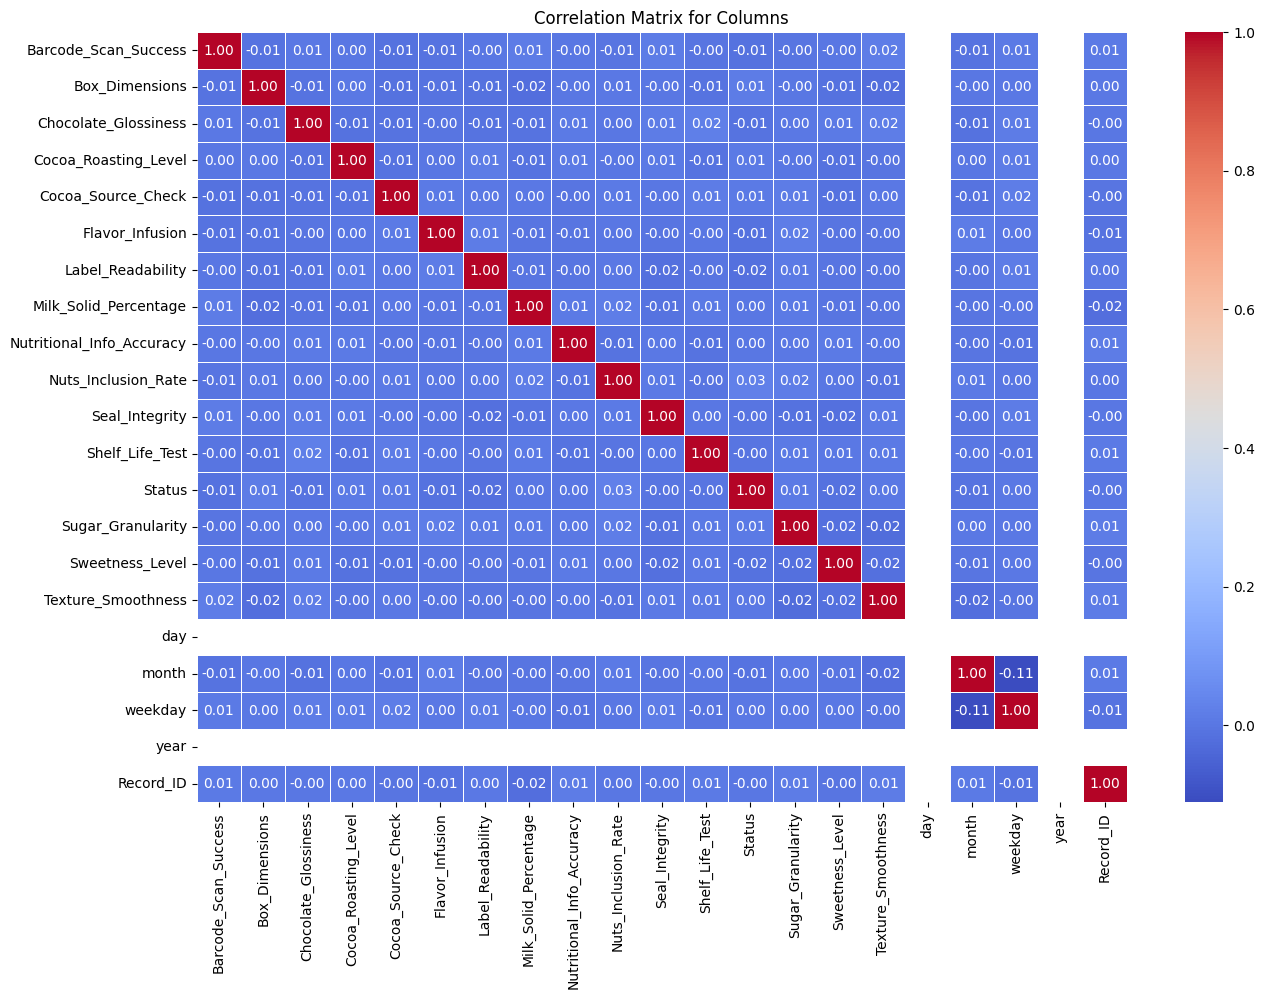

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns that are not 'DateTime' or 'Records_ID' for float transformation
cols_to_convert = df1.select_dtypes(include=['number']).columns.tolist()

# Assuming that 'Feature1' and 'Feature2' are the only numeric ones needed to be transformed
df1[cols_to_convert] = df1[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Now calculate the correlation matrix for these numeric columns
correlation_matrix = df1[cols_to_convert].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Columns')
plt.show()


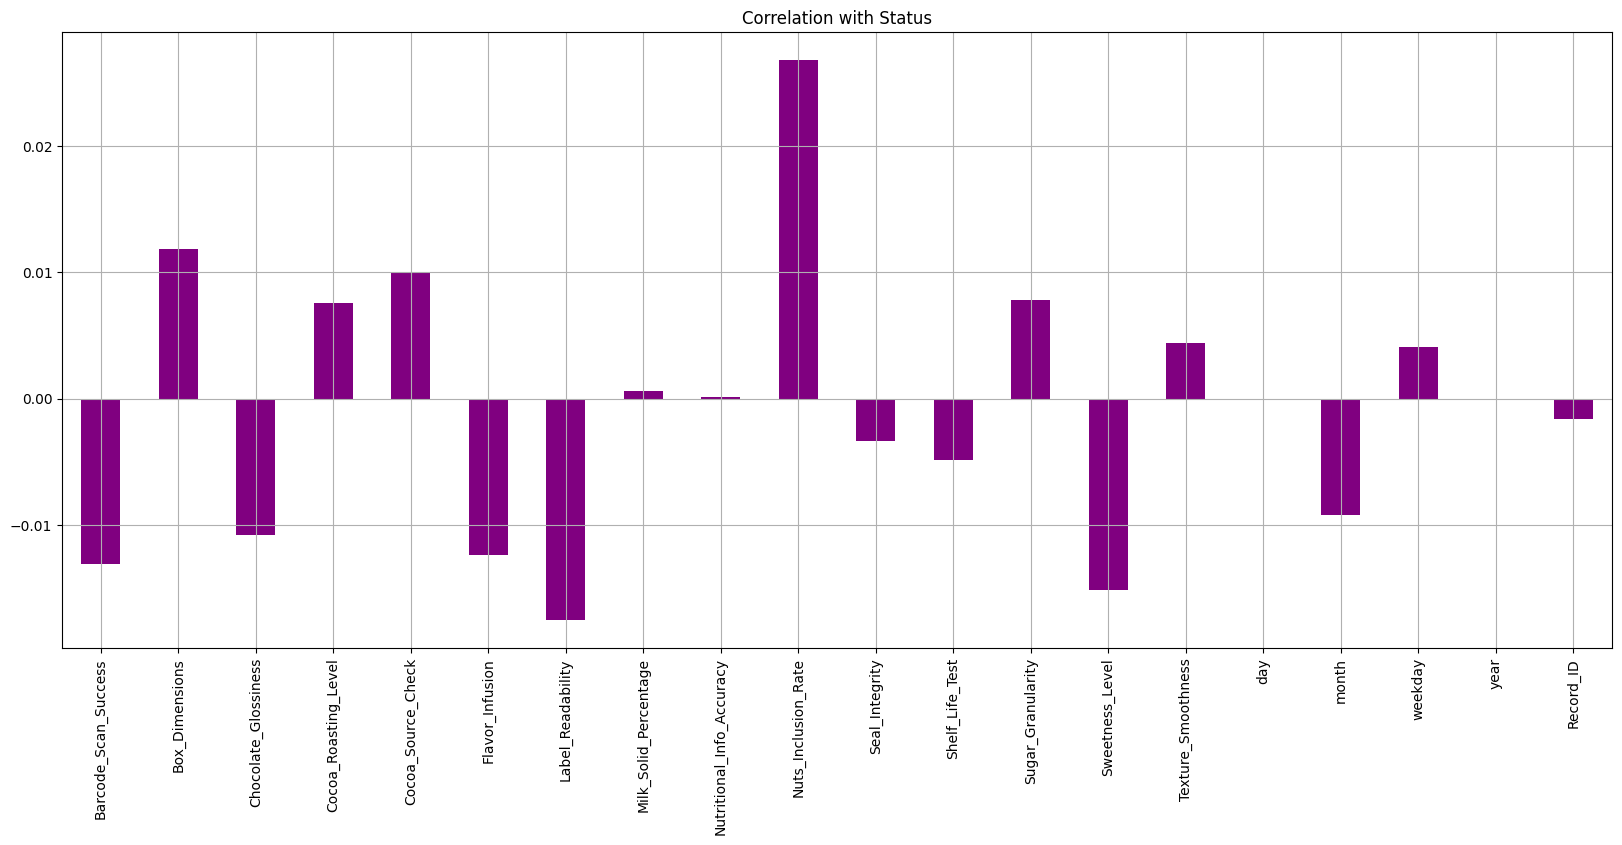

In [34]:
df1.drop('Status', axis=1).corrwith(df1.Status).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Status",color="Purple");

In [35]:
import pandas as pd
cols_to_convert = df1.select_dtypes(include=['number']).columns.tolist()

# Assuming that 'Feature1' and 'Feature2' are the only numeric ones needed to be transformed
df1[cols_to_convert] = df1[cols_to_convert].apply(pd.to_numeric, errors='coerce')
# Assuming df is your DataFrame and 'col' is an array containing all column names
correlation_matrix = df1[cols_to_convert].corr('spearman')
print(correlation_matrix)

                           Barcode_Scan_Success  Box_Dimensions  \
Barcode_Scan_Success                   1.000000       -0.010862   
Box_Dimensions                        -0.010862        1.000000   
Chocolate_Glossiness                   0.004953       -0.010704   
Cocoa_Roasting_Level                   0.004190        0.000962   
Cocoa_Source_Check                    -0.013287       -0.012176   
Flavor_Infusion                       -0.008131       -0.008465   
Label_Readability                      0.000574       -0.012159   
Milk_Solid_Percentage                  0.014422       -0.022488   
Nutritional_Info_Accuracy             -0.000089       -0.002638   
Nuts_Inclusion_Rate                   -0.005391        0.004997   
Seal_Integrity                         0.012811       -0.001001   
Shelf_Life_Test                       -0.003897       -0.008558   
Status                                -0.011396        0.011717   
Sugar_Granularity                     -0.004517       -0.00148

In [36]:
not_okay_df = df1[df1['Status'] == 0]  #
okay_df = df1[df1['Status'] == 1]

In [37]:
print("Not Okay\n")
print(not_okay_df.describe(),"\n")
print("Okay\n")
print(okay_df.describe())

Not Okay

       Barcode_Scan_Success  Box_Dimensions  Chocolate_Glossiness  \
count            802.000000      802.000000            802.000000   
mean               0.514247        0.487478              0.516148   
std                0.279290        0.314274              0.314967   
min                0.000000        0.000000              0.000000   
25%                0.300525        0.213182              0.241772   
50%                0.508655        0.470504              0.510401   
75%                0.717282        0.770276              0.792208   
max                1.000000        1.000000              1.000000   

       Cocoa_Roasting_Level  Cocoa_Source_Check  Flavor_Infusion  \
count            802.000000          802.000000       802.000000   
mean               0.298700            0.487620         0.513017   
std                0.281241            0.312249         0.308687   
min                0.000000            0.000000         0.000000   
25%                0.076255 

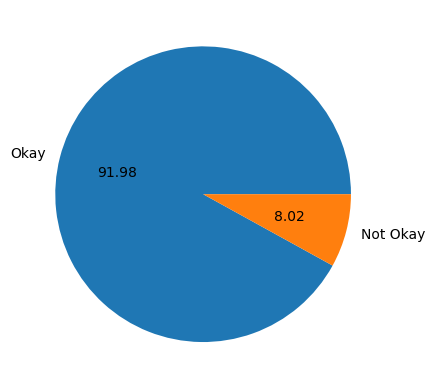

In [38]:
# checking diabetic and non diabetic pepoles average by pie
labels=["Okay","Not Okay"]
plt.pie(df["Status"].value_counts() , labels =labels ,autopct='%.02f' );

The count of "not okay" instances (802) is much smaller than that of "okay" instances (9198), indicating an imbalanced dataset.
Both groups seem to cover similar ranges in their numeric features, but mean and other statistical measures may differ.

Milk Solid Percentage, Nuts Inclusion Rate, and Texture Smoothness: The mean values are very close between the two groups, suggesting these may not be strong discriminators on their own for predicting "not okay" outcomes.
Sweetness Level: Theres a slight variation in the mean values, with "not okay" having a higher mean sweetness level. This could indicate that products with higher sweetness levels are slightly more prone to being "not okay."
Cocoa Source Check and Seal Integrity: These features also show slight variations in mean values between the two groups, which might be worth exploring further.

Negative Correlations: Features such as Label_Readability, Sweetness_Level, and Barcode_Scan_Success have negative correlations with the status. Even though these correlations are very small (close to 0 but negative), it suggests that higher values in these features might slightly decrease the likelihood of an instance being "okay"

Positive Correlations: On the other hand, features like Nuts_Inclusion_Rate, Box_Dimensions, and Cocoa_Source_Check show small positive correlations. This indicates that higher values in these features might slightly increase the likelihood of an instance being "okay"

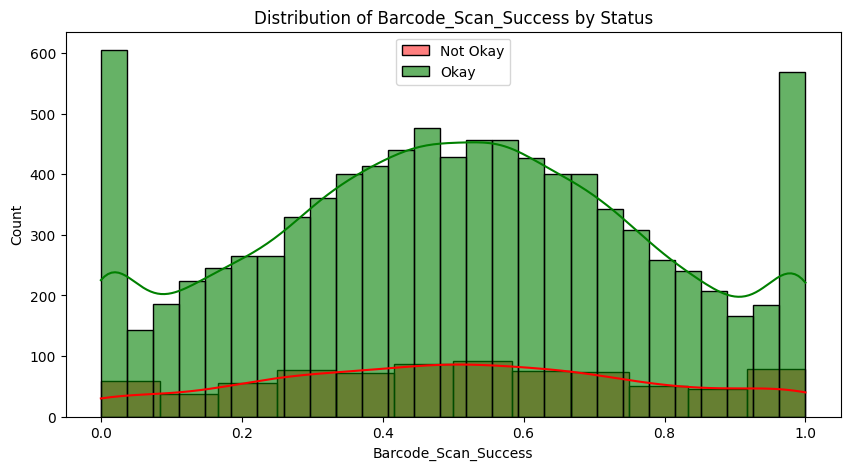

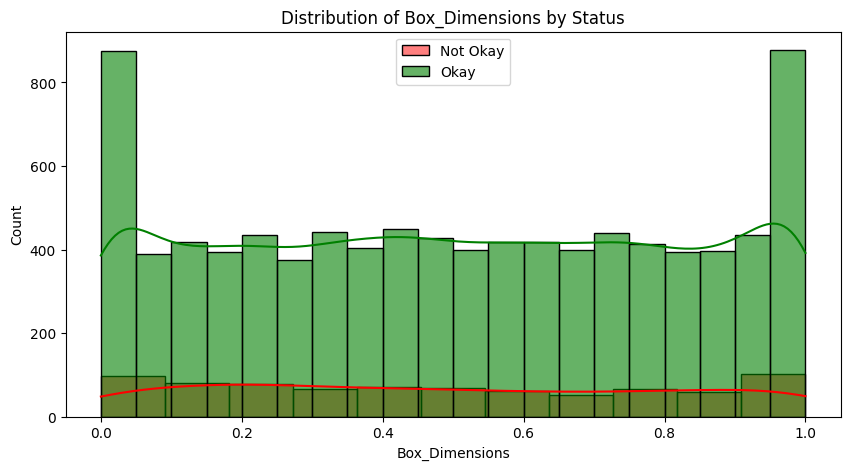

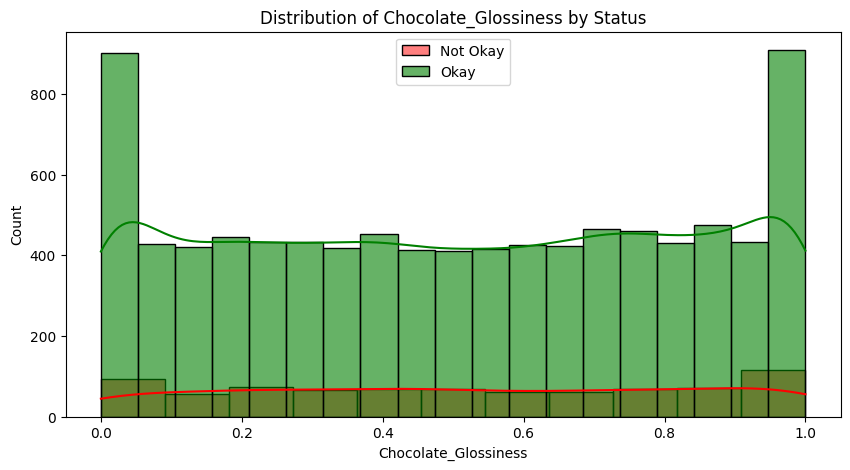

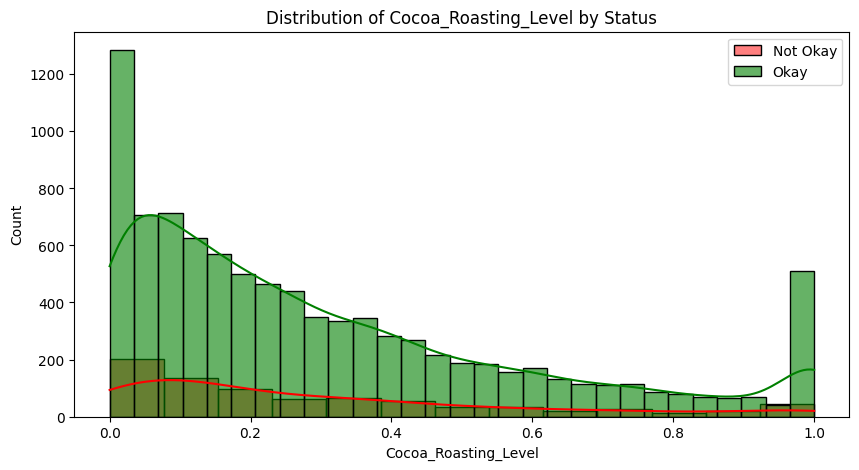

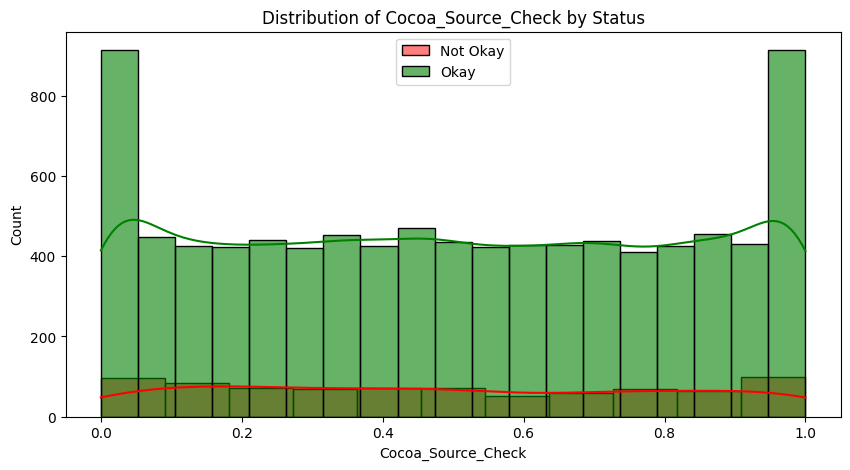

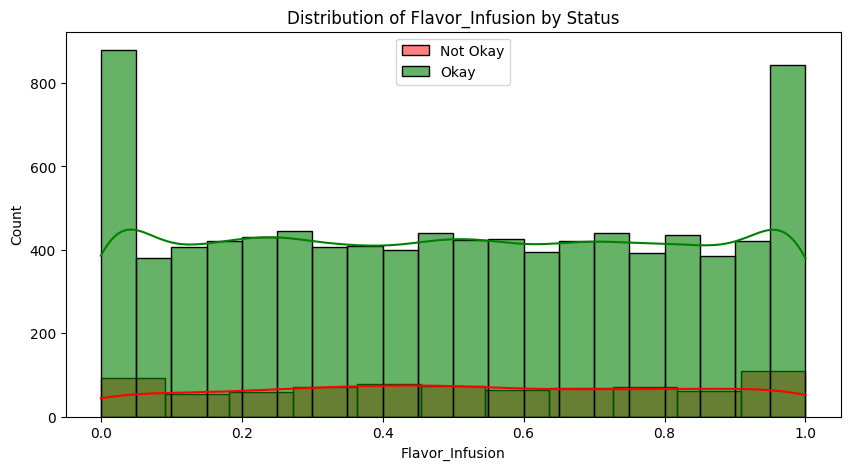

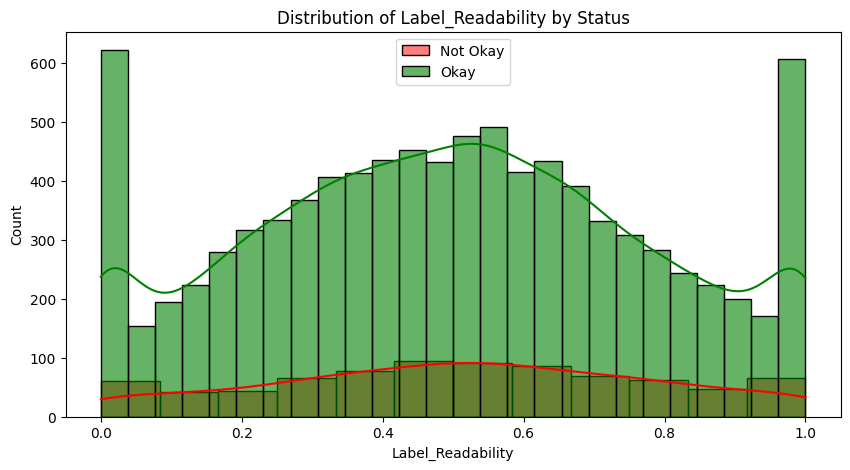

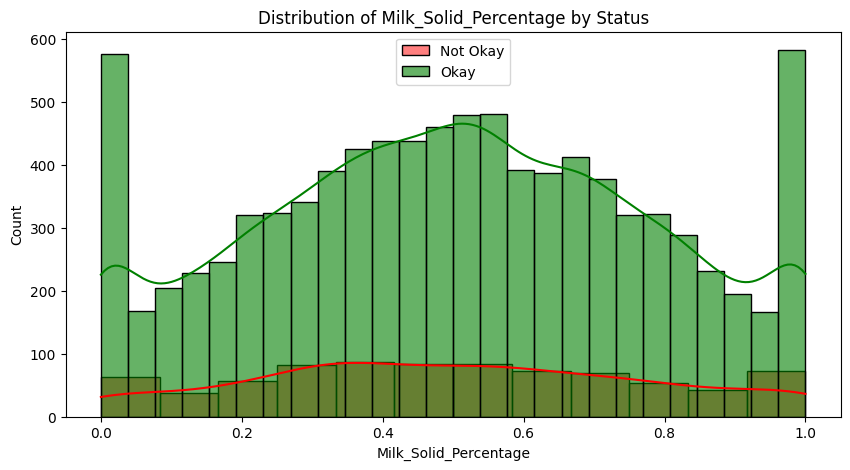

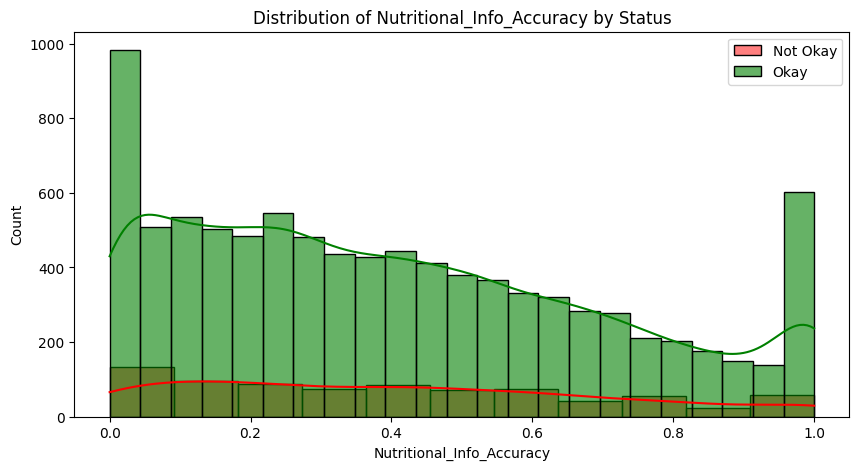

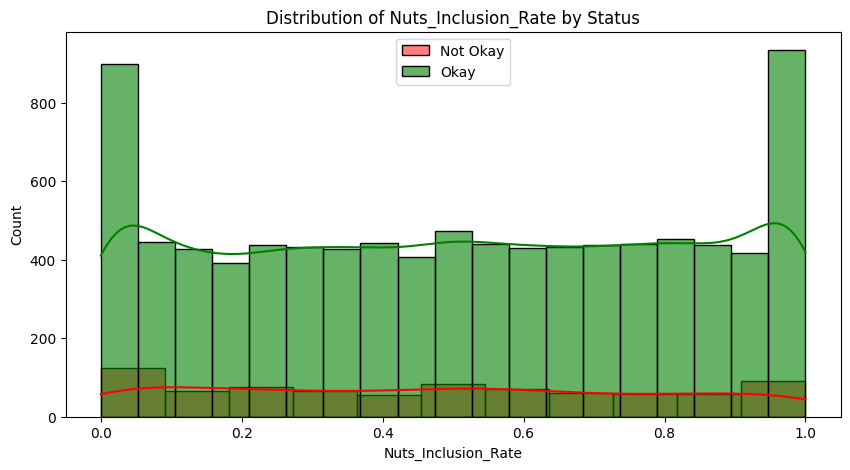

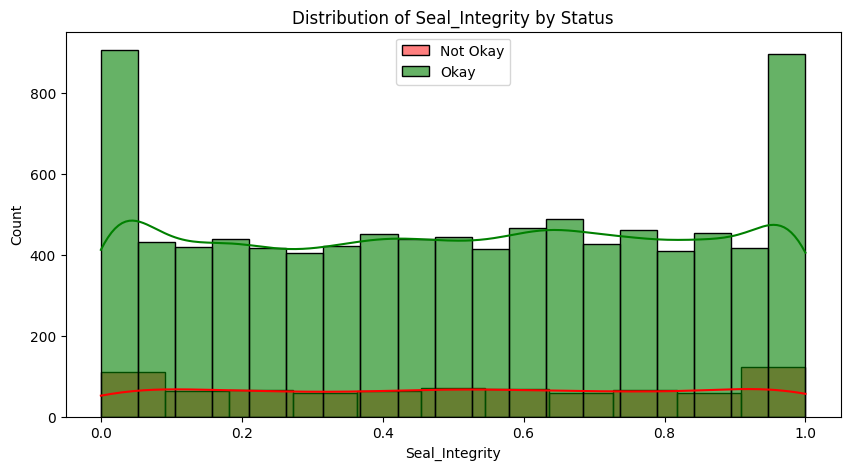

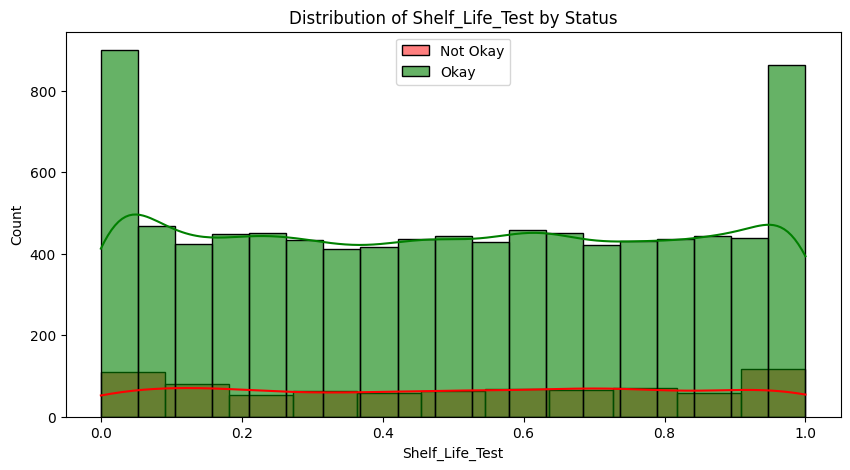

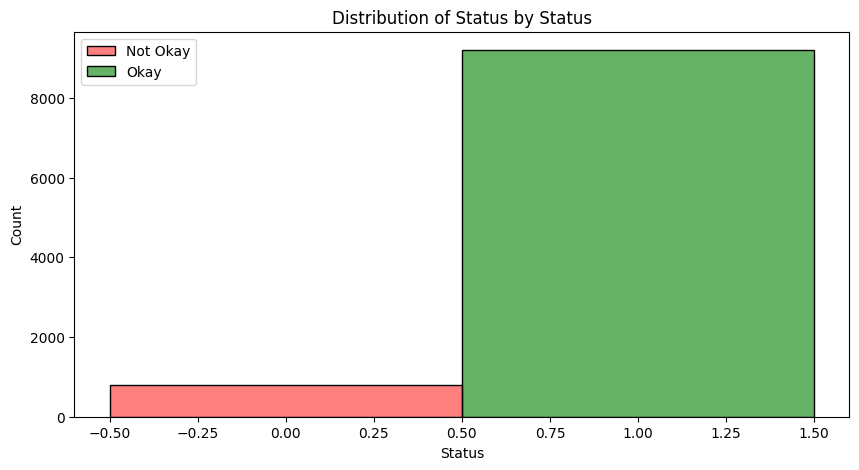

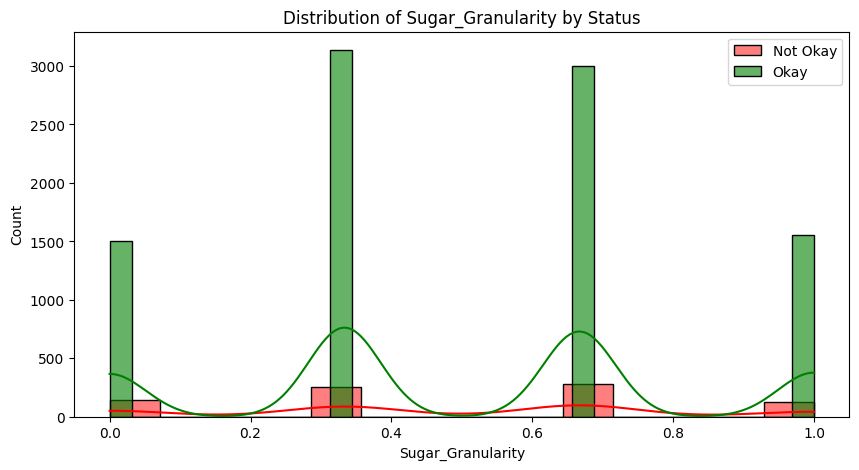

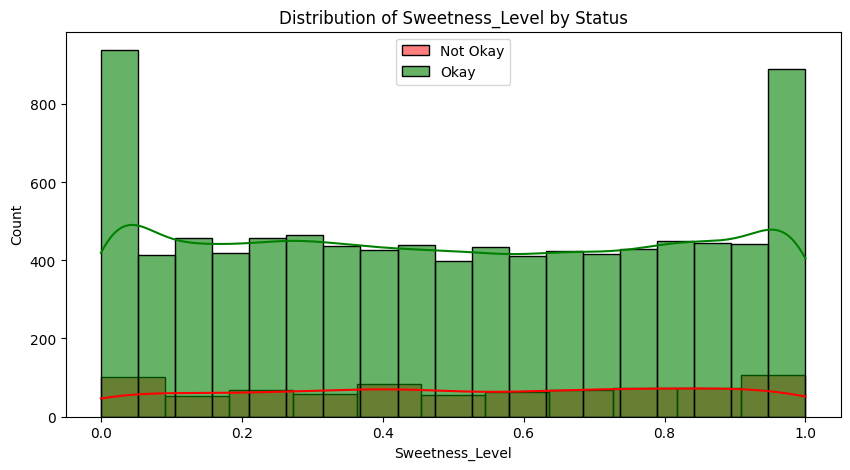

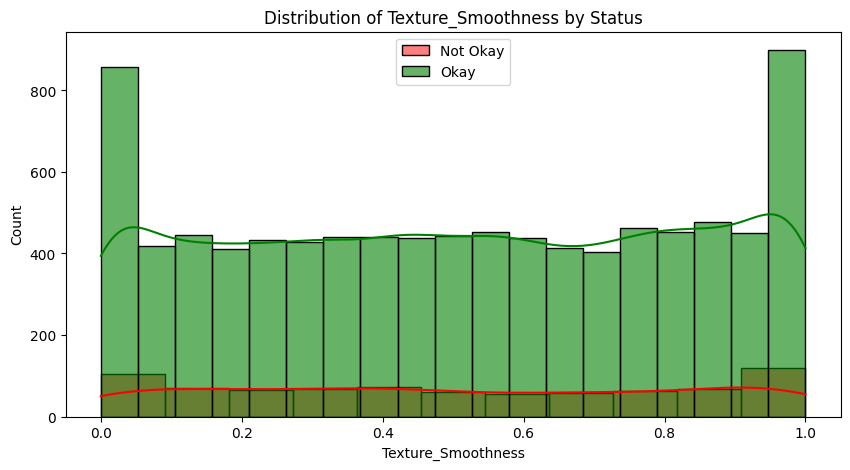

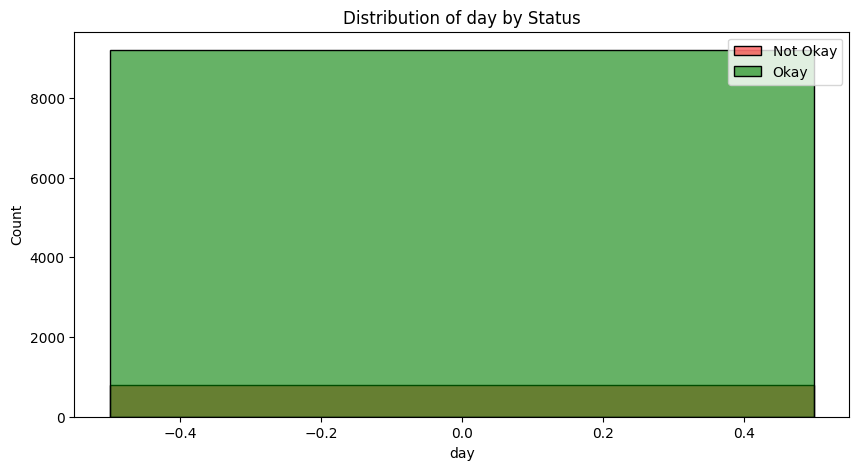

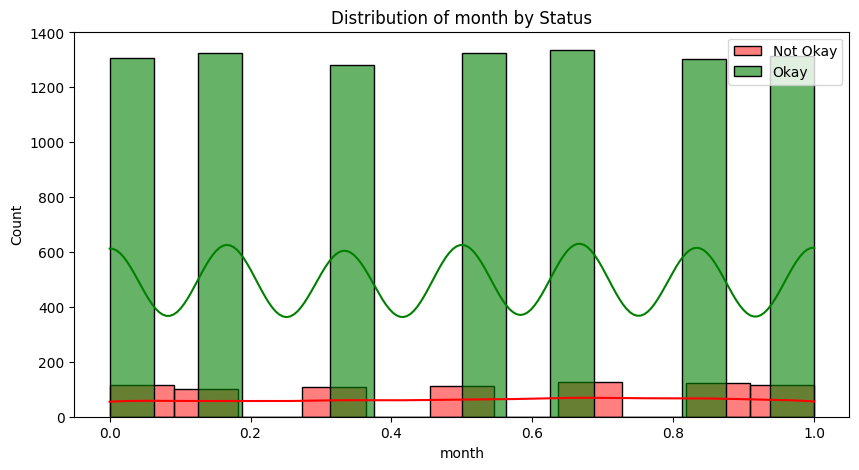

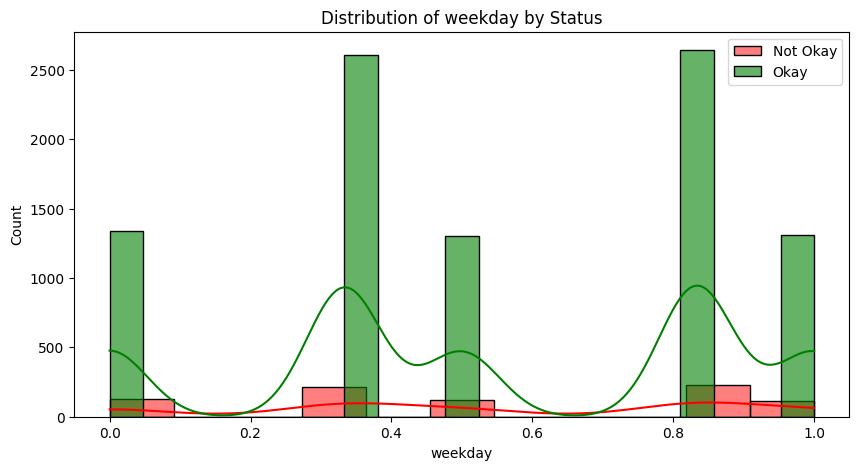

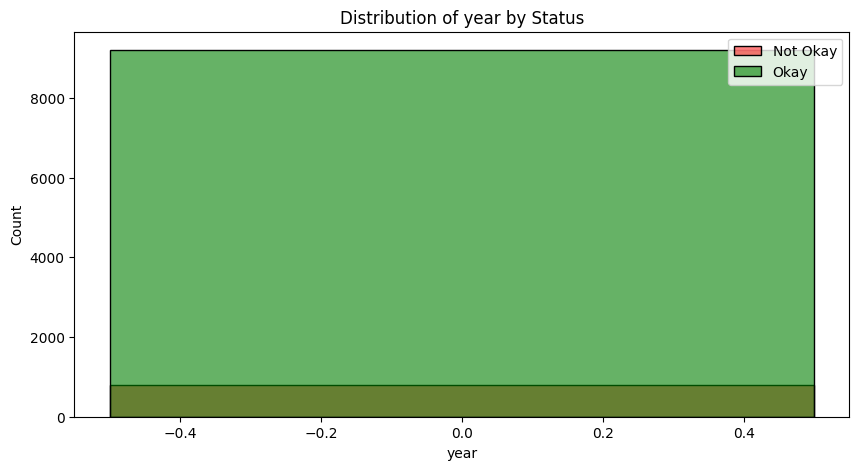

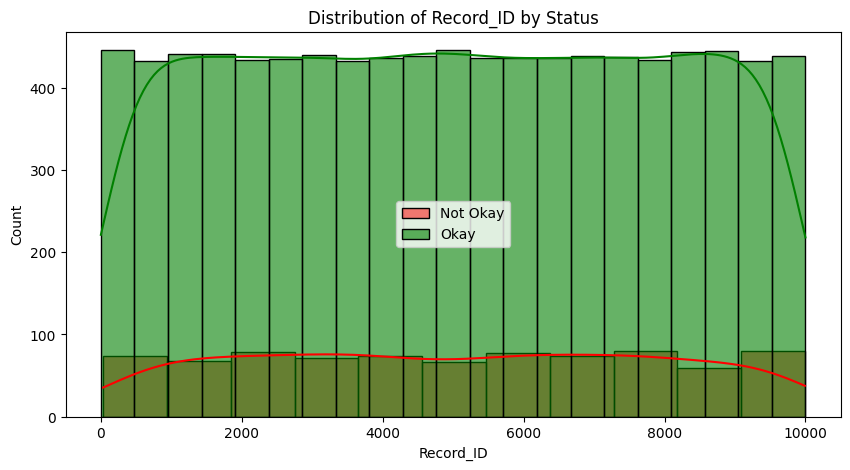

2024-07-06 22:40:33,679 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:33,707 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


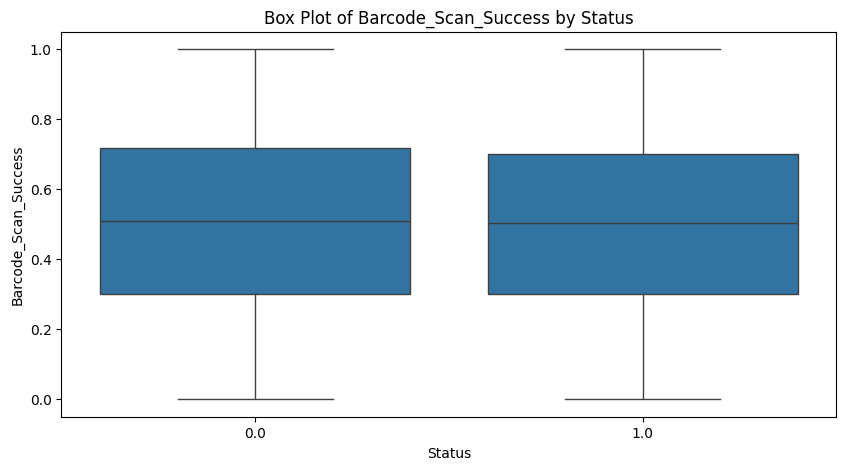

2024-07-06 22:40:34,282 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:34,323 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


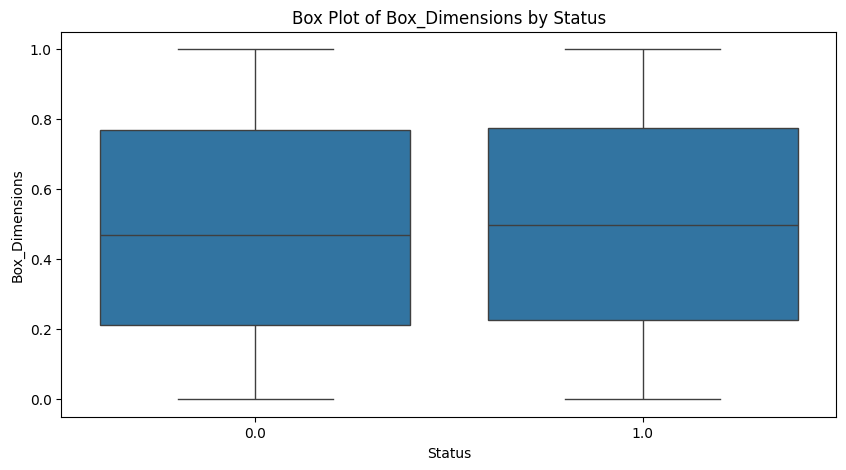

2024-07-06 22:40:34,916 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:34,960 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


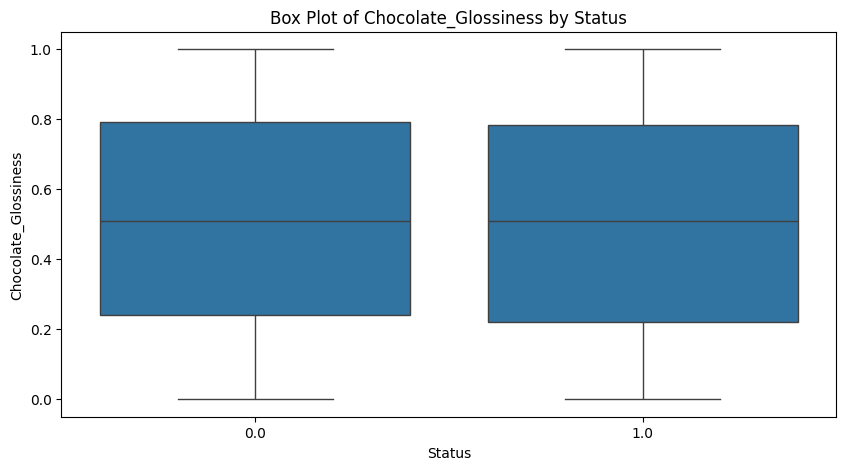

2024-07-06 22:40:35,506 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:35,587 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


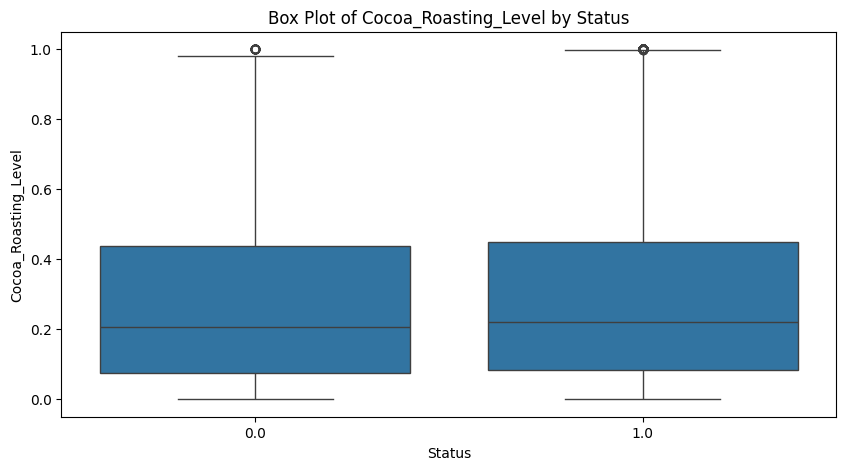

2024-07-06 22:40:35,969 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:36,014 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


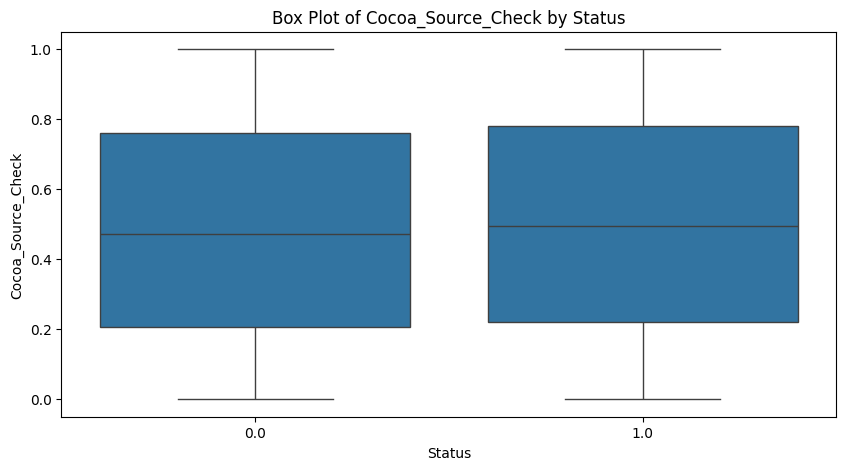

2024-07-06 22:40:36,461 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:36,523 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


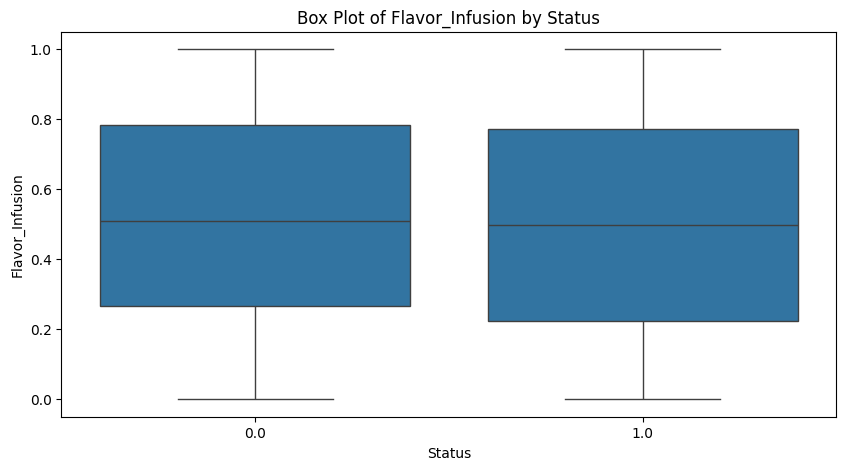

2024-07-06 22:40:37,002 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:37,032 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


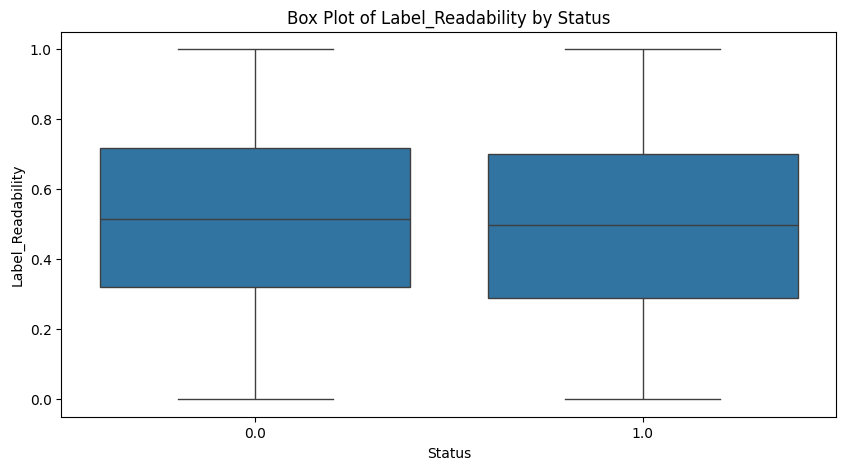

2024-07-06 22:40:37,499 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:37,557 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


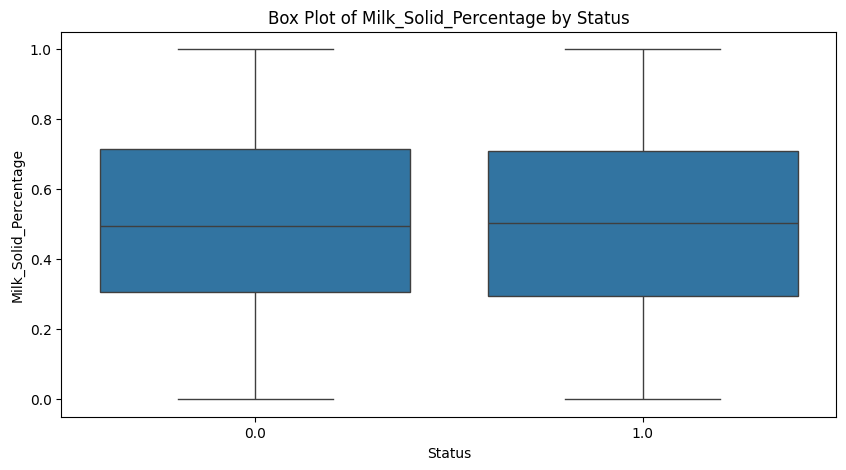

2024-07-06 22:40:37,962 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:38,009 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


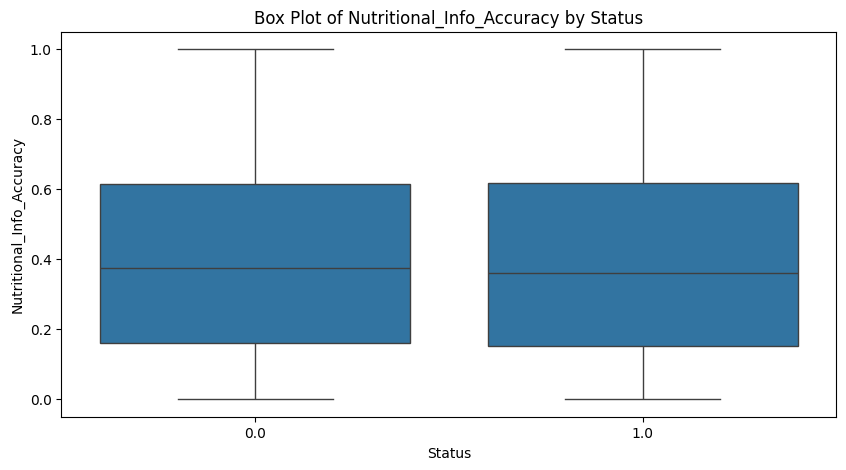

2024-07-06 22:40:38,636 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:38,703 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


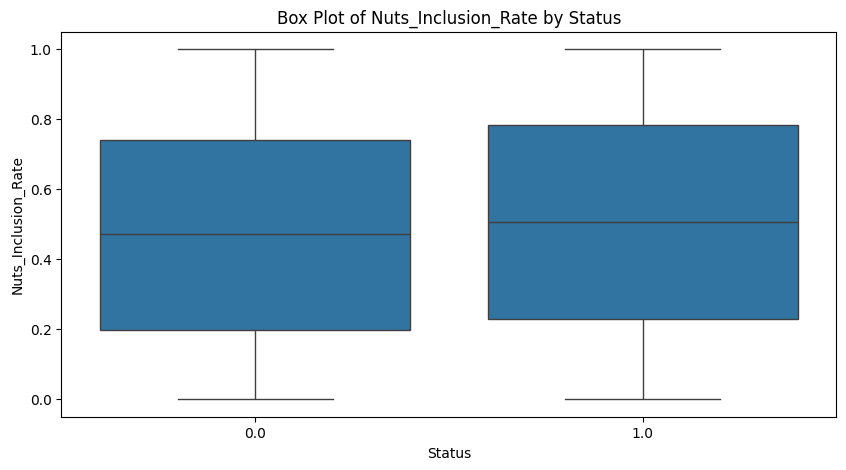

2024-07-06 22:40:39,275 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:39,341 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


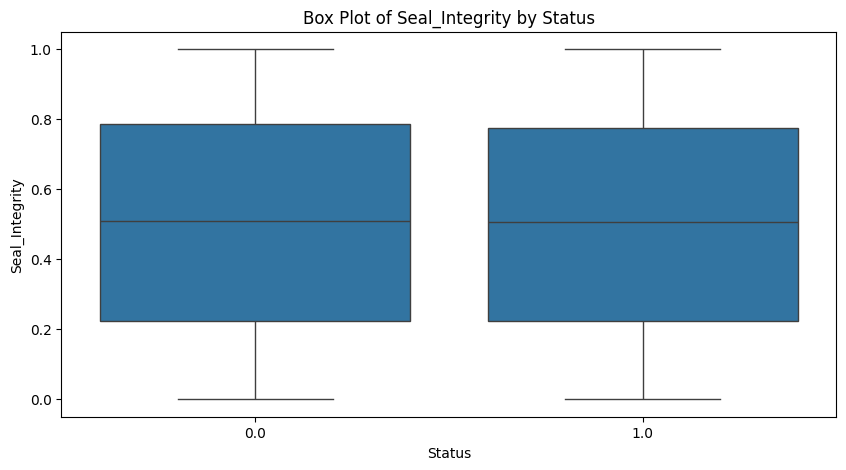

2024-07-06 22:40:39,920 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:39,972 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


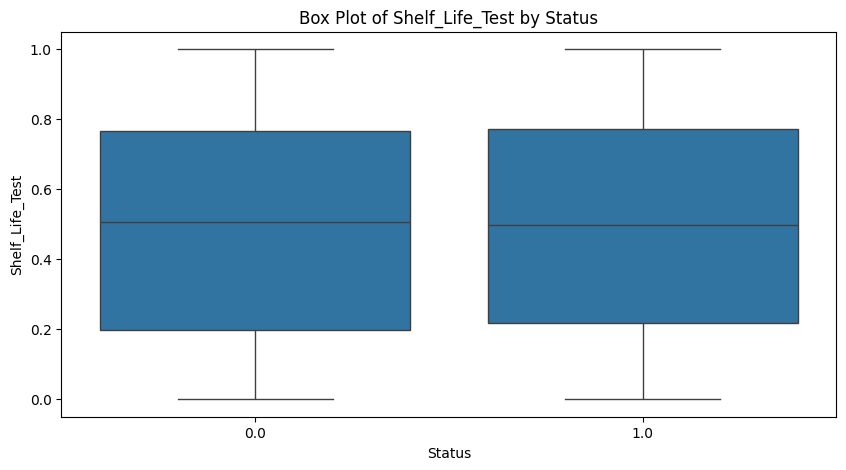

2024-07-06 22:40:41,427 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:41,549 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


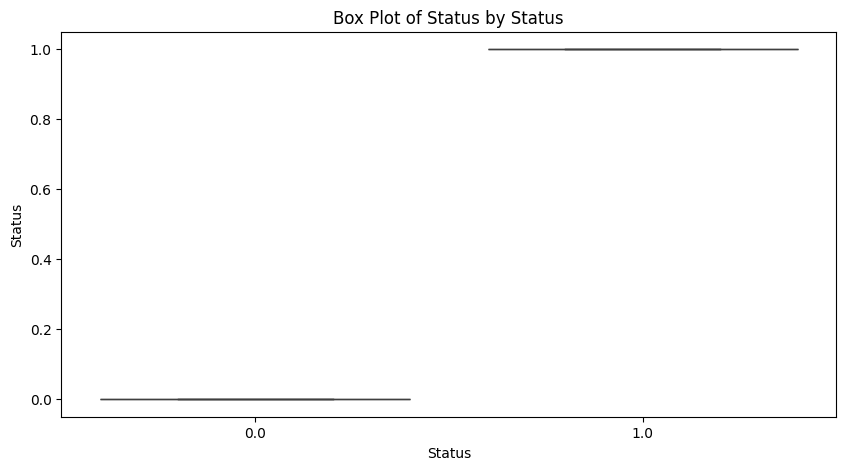

2024-07-06 22:40:42,302 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:42,381 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


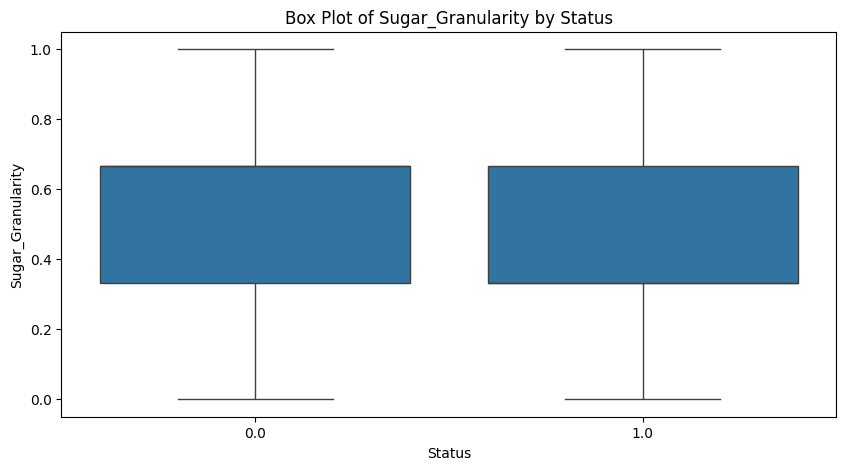

2024-07-06 22:40:43,367 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:43,431 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


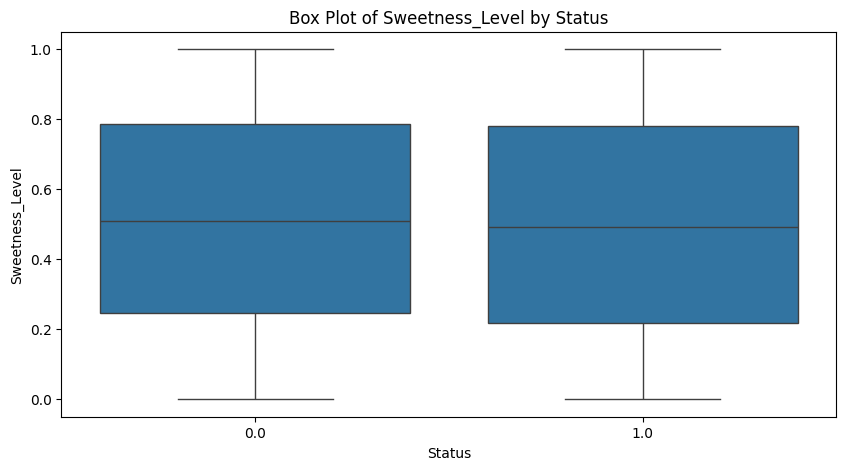

2024-07-06 22:40:44,585 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:44,667 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


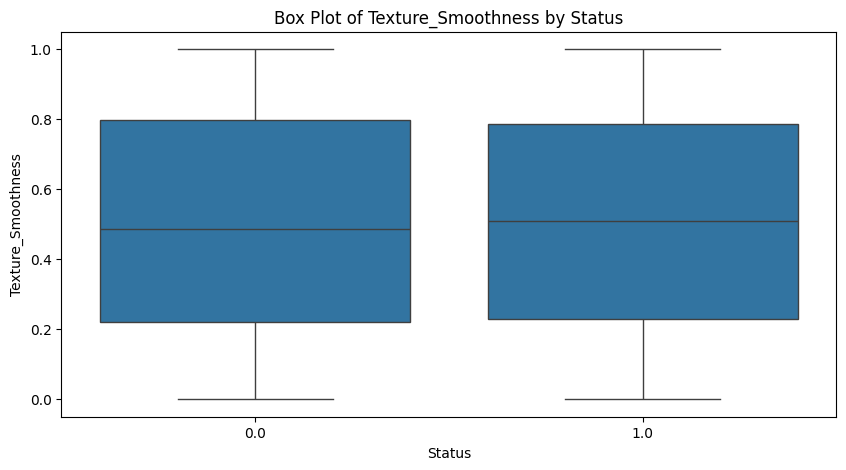

2024-07-06 22:40:45,174 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:45,228 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


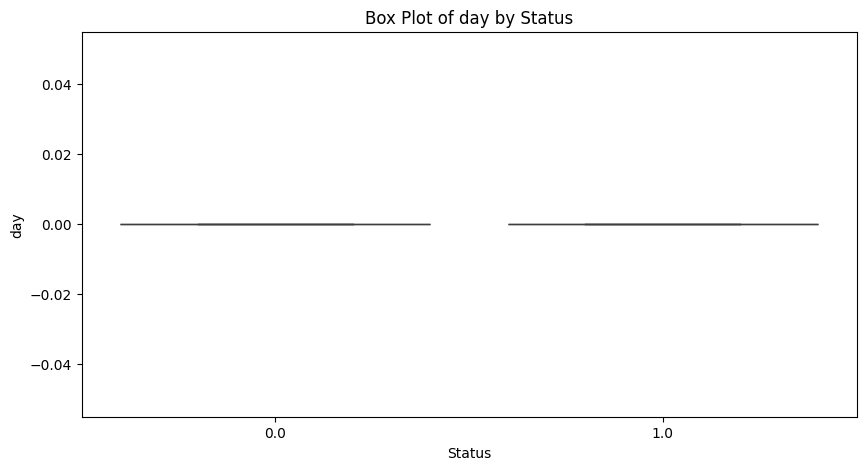

2024-07-06 22:40:45,604 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:45,644 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


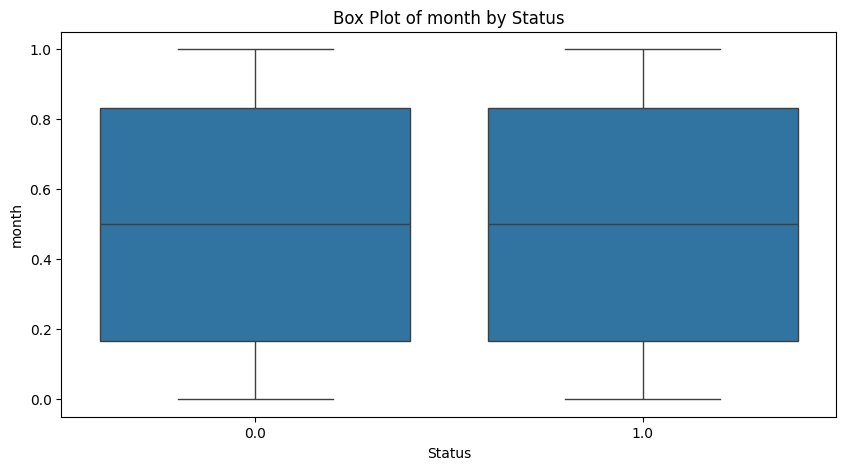

2024-07-06 22:40:46,098 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:46,132 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


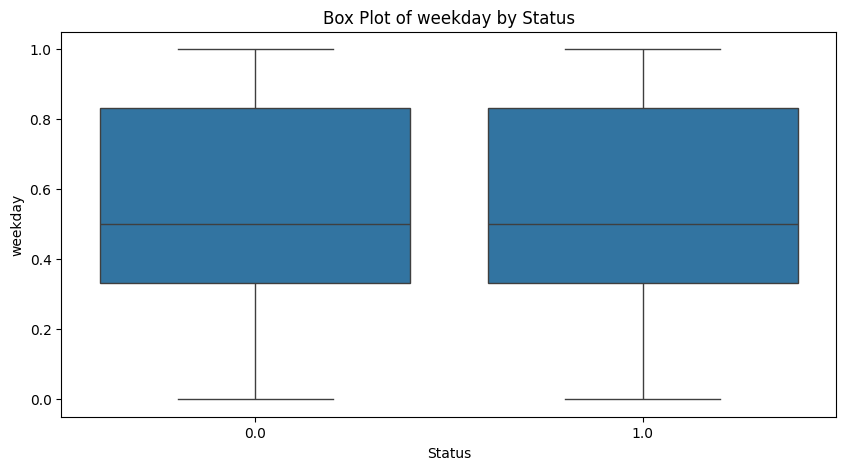

2024-07-06 22:40:46,747 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:46,804 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


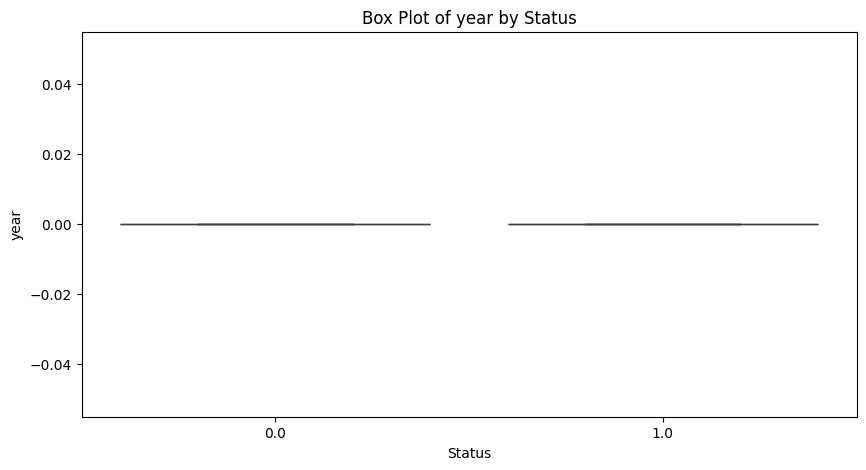

2024-07-06 22:40:47,248 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-07-06 22:40:47,296 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


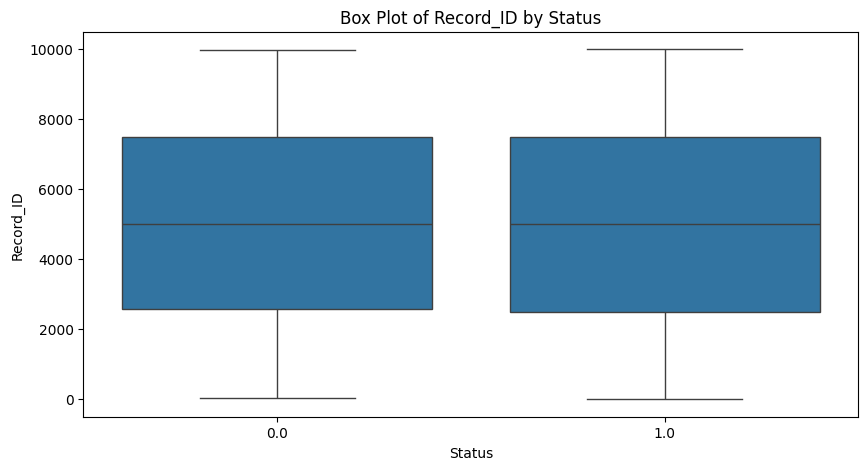

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for each numeric feature
for column in not_okay_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(not_okay_df[column], kde=True, color='red', label='Not Okay')
    sns.histplot(okay_df[column], kde=True, color='green', label='Okay', alpha=0.6)
    plt.title(f'Distribution of {column} by Status')
    plt.legend()
    plt.show()

# Box plots for comparing distributions
for column in not_okay_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Status', y=column, data=df1)
    plt.title(f'Box Plot of {column} by Status')
    plt.show()

# **Features Analysis**

In [40]:
from imblearn.over_sampling import SMOTE
# Prepare data
X = df1.drop('Status', axis=1)
y = df1['Status']

# Balancing dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Splitting the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=42)

In [41]:
import numpy as np

# Count the number of occurrences where the class label is 0
count_class_0 = np.count_nonzero(y_balanced == 0)
print("Number of instances with class 0:", count_class_0)

count_class_1 = np.count_nonzero(y_balanced == 1)
print("Number of instances with class 1:", count_class_1)

Number of instances with class 0: 9198
Number of instances with class 1: 9198


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression' : LogisticRegression(class_weight='balanced', random_state=42),
    'KNN' : KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)


In [43]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    # Output the final test results
    print(name)
    print("Test Accuracy:", test_accuracy)
    print("Confusion Matrix:\n", test_conf_matrix)
    print("Classification Report:\n", test_class_report)


Random Forest
Test Accuracy: 0.9489130434782609
Confusion Matrix:
 [[1654  188]
 [   0 1838]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      1842
         1.0       0.91      1.00      0.95      1838

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680

Logistic Regression
Test Accuracy: 0.5005434782608695
Confusion Matrix:
 [[1842    0]
 [1838    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      1842
         1.0       0.00      0.00      0.00      1838

    accuracy                           0.50      3680
   macro avg       0.25      0.50      0.33      3680
weighted avg       0.25      0.50      0.33      3680



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN
Test Accuracy: 0.6415760869565217
Confusion Matrix:
 [[1359  483]
 [ 836 1002]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.74      0.67      1842
         1.0       0.67      0.55      0.60      1838

    accuracy                           0.64      3680
   macro avg       0.65      0.64      0.64      3680
weighted avg       0.65      0.64      0.64      3680



Based on the above test results, the best model to use is the random forest classifier.

Top 10 features based on consensus from multiple methods:
['weekday', 'month', 'Sugar_Granularity', 'Cocoa_Source_Check', 'Record_ID', 'Sweetness_Level', 'Nuts_Inclusion_Rate', 'Cocoa_Roasting_Level', 'Nutritional_Info_Accuracy', 'Seal_Integrity']


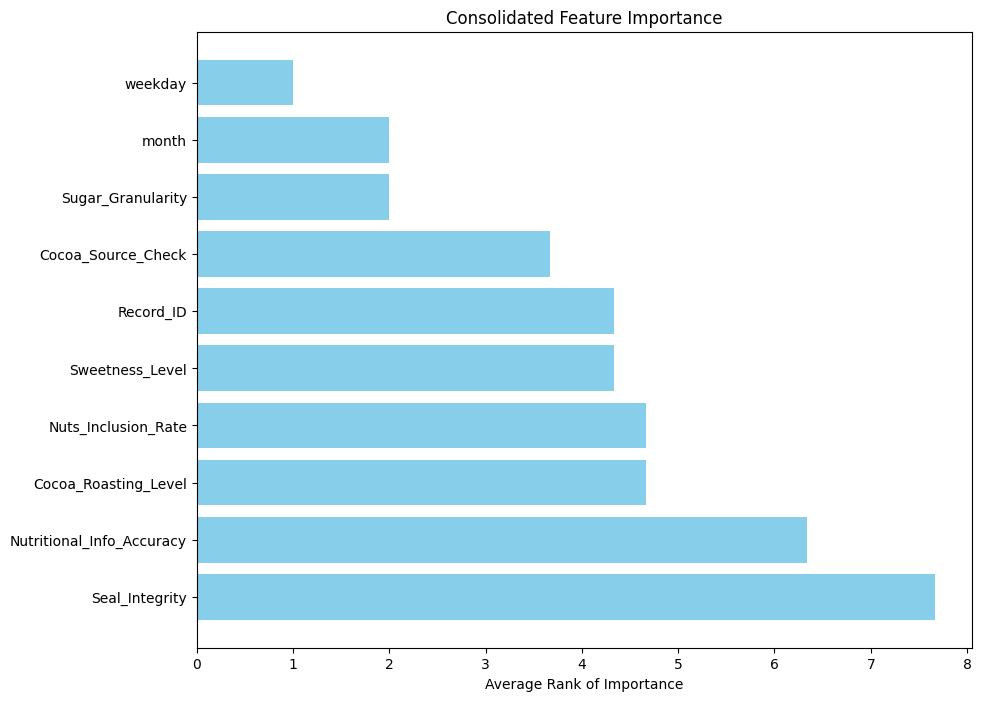

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE


# Train model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Random Forest Feature Importance
feature_importances_rf = rf.feature_importances_
feature_names = X_train.columns

# Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = perm_importance.importances_mean

# Recursive Feature Elimination
rfe = RFE(estimator=rf, n_features_to_select=10)
rfe.fit(X_train, y_train)
rfe_ranks = rfe.ranking_

# Combine all feature importance metrics into a DataFrame
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': feature_importances_rf,
    'Perm_Importance': perm_importances,
    'RFE_Rank': rfe_ranks
})

# Calculate ranks for Random Forest and Permutation Importance
df_importances['RF_Rank'] = df_importances['RF_Importance'].rank(ascending=False, method='min')
df_importances['Perm_Rank'] = df_importances['Perm_Importance'].rank(ascending=False, method='min')

# Calculate the average rank across all methods
df_importances['Average_Rank'] = df_importances[['RF_Rank', 'Perm_Rank', 'RFE_Rank']].mean(axis=1)

# Sort features by average rank
df_importances_sorted = df_importances.sort_values('Average_Rank')

# Select top 10 features based on average rank
top_features = df_importances_sorted.head(10)['Feature'].tolist()

print("Top 10 features based on consensus from multiple methods:")
print(top_features)

# Visualizing consolidated feature importance
plt.figure(figsize=(10, 8))
plt.barh(top_features, df_importances_sorted.head(10)['Average_Rank'], color='skyblue')
plt.xlabel('Average Rank of Importance')
plt.title('Consolidated Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Based on the average we take these 10 features and drop the others


In [45]:
dff = df1.copy()

In [46]:
col = ['weekday', 'month', 'Sugar_Granularity','Status', 'Cocoa_Source_Check','Record_ID','Sweetness_Level','Nuts_Inclusion_Rate', 'Cocoa_Roasting_Level', 'Nutritional_Info_Accuracy', 'Seal_Integrity']
# Loop through each column in df1
for c in df1.columns:
    # Check if the column is not in the list 'col'
    if c not in col:
        # Drop the column from df1
        df1.drop(c, axis=1, inplace=True)

# **Predictive Modeling**

In [47]:
from imblearn.over_sampling import SMOTE
# Prepare data
X = df1.drop('Status', axis=1)
y = df1['Status']

# Balancing dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Splitting the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.20, random_state=42)


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE


# Train model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Output the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Accuracy:", np.std(cv_scores))

rf.fit(X_train, y_train)


Cross-Validation Accuracy Scores: [0.94701087 0.94835202 0.95005097 0.95514781 0.95650697]
Mean Cross-Validation Accuracy: 0.9514137267502842
Standard Deviation of Cross-Validation Accuracy: 0.003755016578177537


RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:


# Now, test on the unseen test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Output the final test results
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", test_conf_matrix)
print("Classification Report:\n", test_class_report)

Test Accuracy: 0.9459239130434782
Confusion Matrix:
 [[1646  196]
 [   3 1835]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1842
         1.0       0.90      1.00      0.95      1838

    accuracy                           0.95      3680
   macro avg       0.95      0.95      0.95      3680
weighted avg       0.95      0.95      0.95      3680



In [50]:

# predictions_df = pd.DataFrame(y_test_pred, columns=['predictions'])
# predictions_df.to_csv('model_predictionsStatus.csv', index=False)

# from google.colab import files
# files.download('model_predictionsStatus.csv')

In [51]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=816b7c9f8c5fe38a997d31ea015bcde97eaa27f56e08adcc95c7643025652a00
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [52]:
import lime
from lime import lime_tabular

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Okay', 'Okay'],
    mode='classification'
)

# Choose an instance to explain
instance = X_test.iloc[0].values

# Generate explanation for the instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=rf.predict_proba
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
import pandas as pd

# Load the CSV file
file_path2 = '/content/Randomrework_data.csv'
df2 = pd.read_csv(file_path2)

# Display the first few rows of the DataFrame to inspect it
print(df2.head())
print(df2.shape)

  Record_ID  Rework_Time  Rework_Cost
0      WX34           21           20
1      WX35           12           14
2      WX64           20            9
3      WX72           11           14
4      WX89           12            9
(802, 3)


In [54]:
# Check data types
print(df2.dtypes)

Record_ID      object
Rework_Time     int64
Rework_Cost     int64
dtype: object


In [55]:
# Convert non-numeric columns to numeric if possible
df2['Record_ID'] = df2['Record_ID'].str.extract('(\d+)').astype(int)

In [56]:
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df2, minimal=True)
profile.to_notebook_iframe()

2024-07-06 22:43:07,261 - DEBUG - Starting new HTTPS connection (1): packages.ydata.ai:443
2024-07-06 22:43:07,573 - DEBUG - https://packages.ydata.ai:443 "GET /ydata-profiling?version=4.8.3&python_version=3.10&report_type=regular&dataframe=pandas&datatype=tabular&os=Linux&gpu=False HTTP/1.1" 200 None


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
df2.isnull().sum()

Record_ID      0
Rework_Time    0
Rework_Cost    0
dtype: int64

In [58]:

cols_to_convert = [col for col in df2.columns]
# Check for duplicate rows
print("Duplicate entries:", df2.duplicated().sum())
# Convert the selected columns to their absolute values
df2[cols_to_convert] = df2[cols_to_convert].abs()

print(df2)

Duplicate entries: 0
     Record_ID  Rework_Time  Rework_Cost
0           34           21           20
1           35           12           14
2           64           20            9
3           72           11           14
4           89           12            9
..         ...          ...          ...
797       9944           27           16
798       9954           11           17
799       9976           16           16
800       9980           23           14
801       9992           23           20

[802 rows x 3 columns]


There is no missing or negative values

Number of outliers in Rework_Time: 0
Empty DataFrame
Columns: [Record_ID, Rework_Time, Rework_Cost]
Index: []
Number of outliers in Rework_Cost: 0
Empty DataFrame
Columns: [Record_ID, Rework_Time, Rework_Cost]
Index: []


<ipython-input-59-c0c02c13ff86>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df2, palette='Set2')
<ipython-input-59-c0c02c13ff86>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=col, data=df2, palette='Set2')


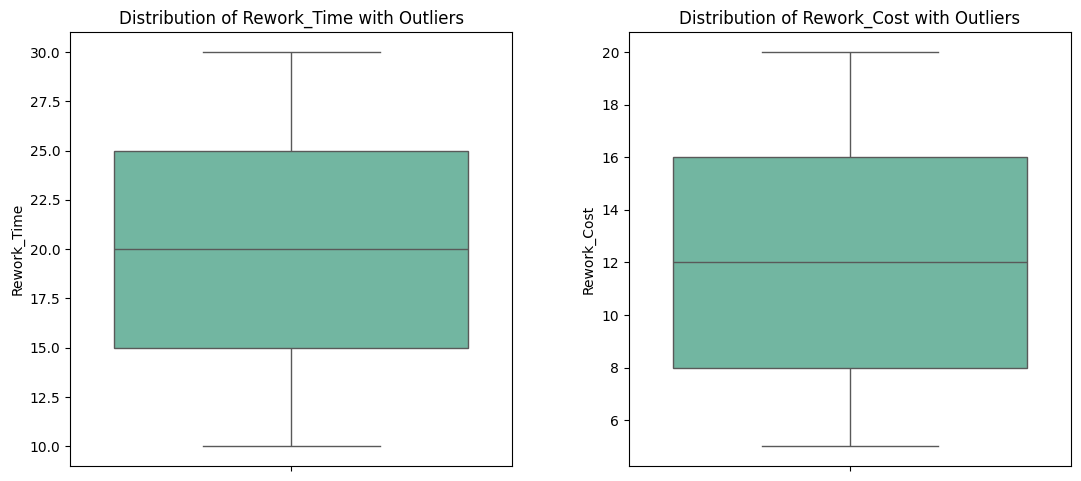

In [59]:
import seaborn as sns
columns = ['Rework_Time', 'Rework_Cost']

# Initialize a dictionary to store the outliers
outliers = {}

for col in columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the interquartile range

    # Define the lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers[col] = df2[(df2[col] < lower_bound) | (df2[col] > upper_bound)]

    print(f"Number of outliers in {col}: {len(outliers[col])}")
    print(outliers[col])

# Visualize the outliers using box plots
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(y=col, data=df2, palette='Set2')
    plt.title(f'Distribution of {col} with Outliers')
    plt.xlabel('')  # Remove x-label to reduce clutter

plt.tight_layout(pad=5.0)  # Adjust layout with padding to prevent overlap
plt.show()

No outliers.

# **EDA 2**

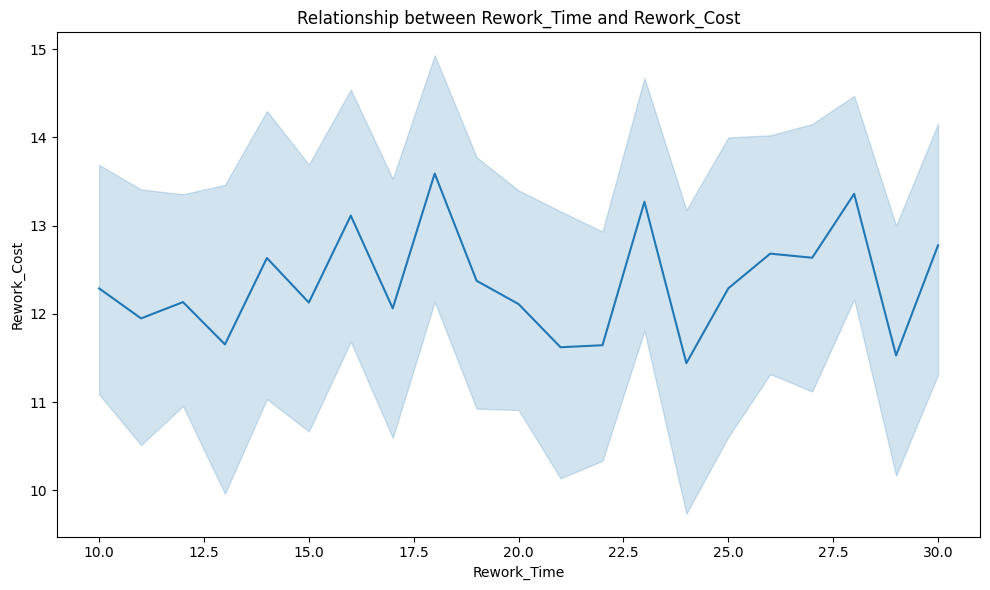

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot
x_col = 'Rework_Time'
y_col = 'Rework_Cost'

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_col, y=y_col, data=df2)
plt.title(f'Relationship between {x_col} and {y_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.tight_layout()
plt.show()

Line Plot: The blue line represents the trend of Rework_Cost as Rework_Time changes. Each point on the line corresponds to a pair of Rework_Time and Rework_Cost values.

Shaded Area: The shaded area around the line represents the confidence interval of the line plot. It gives a visual indication of the variability or uncertainty around the mean relationship between Rework_Time and Rework_Cost. The wider the shaded area, the greater the variability in the data points around the line.

As Rework_Time increases, Rework_Cost doesnt necessarily increase or decrease theyre not proportional

In [61]:
# from google.colab import files
# df2.to_excel('CostTime.xlsx', index=False)
# files.download('CostTime.xlsx')

In [62]:
merged_df = pd.merge(dff, df2, on='Record_ID')

# Display the merged dataframe (optional, for verification)
print("\nMerged DataFrame:")
print(merged_df.head())



Merged DataFrame:
   Barcode_Scan_Success  Box_Dimensions  Chocolate_Glossiness  \
0              0.367727        0.633567              1.000000   
1              0.429744        0.142625              0.617455   
2              0.904279        0.270887              0.000000   
3              0.590554        0.020778              0.776852   
4              0.639256        0.000000              0.778872   

   Cocoa_Roasting_Level  Cocoa_Source_Check  Flavor_Infusion  \
0              0.137666            0.739813         0.562767   
1              0.071517            0.274193         0.230802   
2              0.940458            0.856698         0.105172   
3              0.043299            0.596976         0.938525   
4              0.000000            0.645544         0.879375   

   Label_Readability  Milk_Solid_Percentage  Nutritional_Info_Accuracy  \
0           0.348705               0.356410                   0.076470   
1           0.503898               0.264698              

In [63]:
print(merged_df)

     Barcode_Scan_Success  Box_Dimensions  Chocolate_Glossiness  \
0                0.367727        0.633567              1.000000   
1                0.429744        0.142625              0.617455   
2                0.904279        0.270887              0.000000   
3                0.590554        0.020778              0.776852   
4                0.639256        0.000000              0.778872   
..                    ...             ...                   ...   
797              0.386042        1.000000              0.994175   
798              0.654840        0.662674              0.706846   
799              0.419642        0.079589              0.835679   
800              0.179939        0.728712              0.781509   
801              0.630668        0.088491              0.526427   

     Cocoa_Roasting_Level  Cocoa_Source_Check  Flavor_Infusion  \
0                0.137666            0.739813         0.562767   
1                0.071517            0.274193         0.230802 

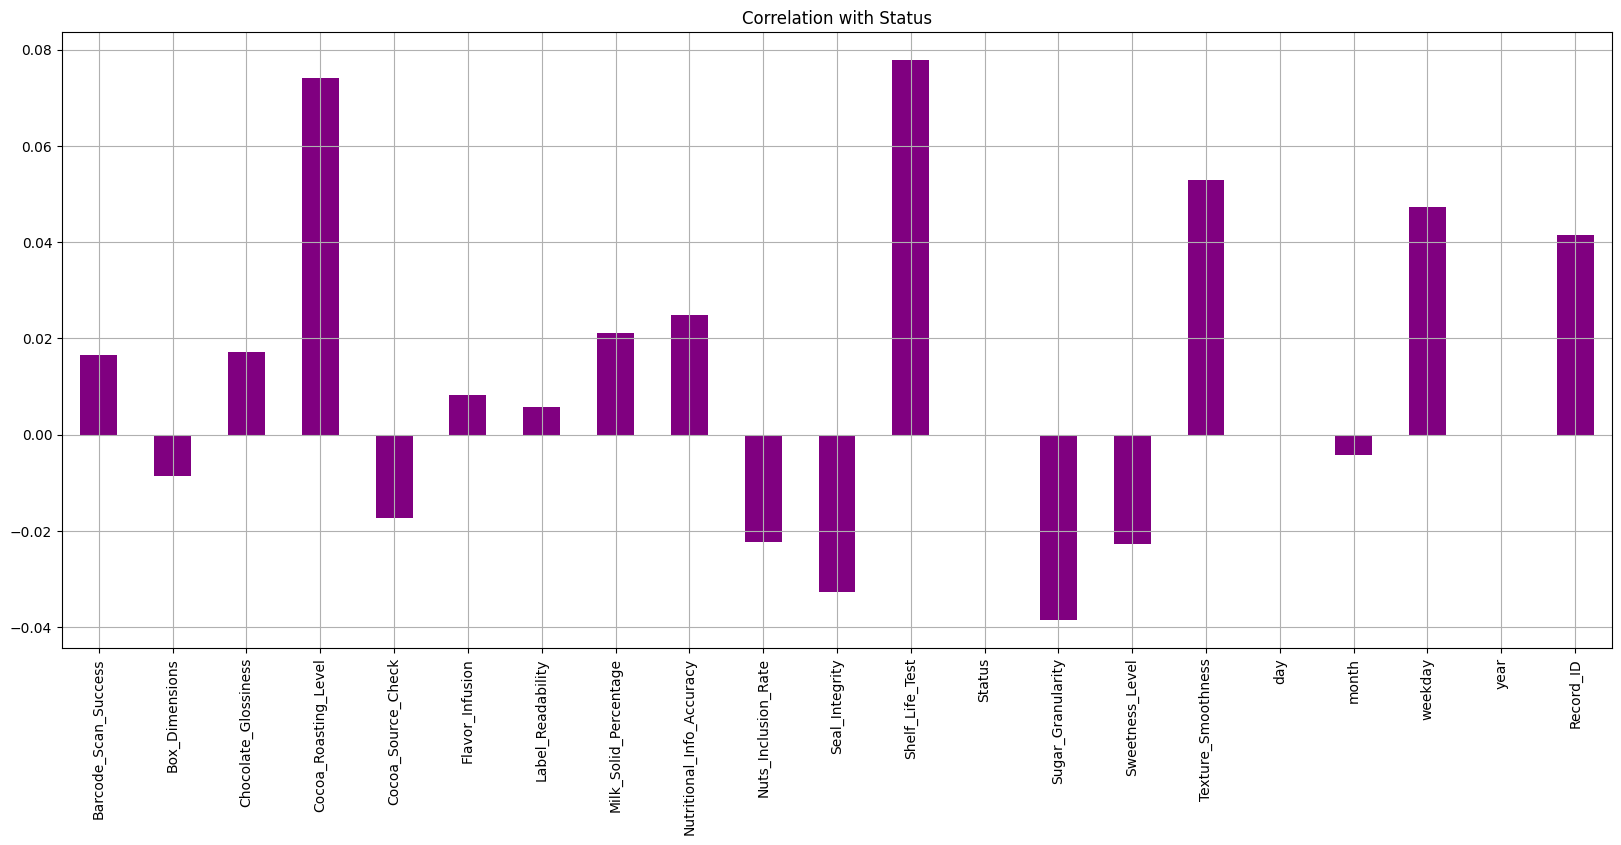

In [64]:
merged_df.drop(['Rework_Cost','Rework_Time'], axis=1).corrwith(merged_df.Rework_Cost).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Status",color="Purple");

2024-07-06 22:43:15,212 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x7cf0fdfeea40>


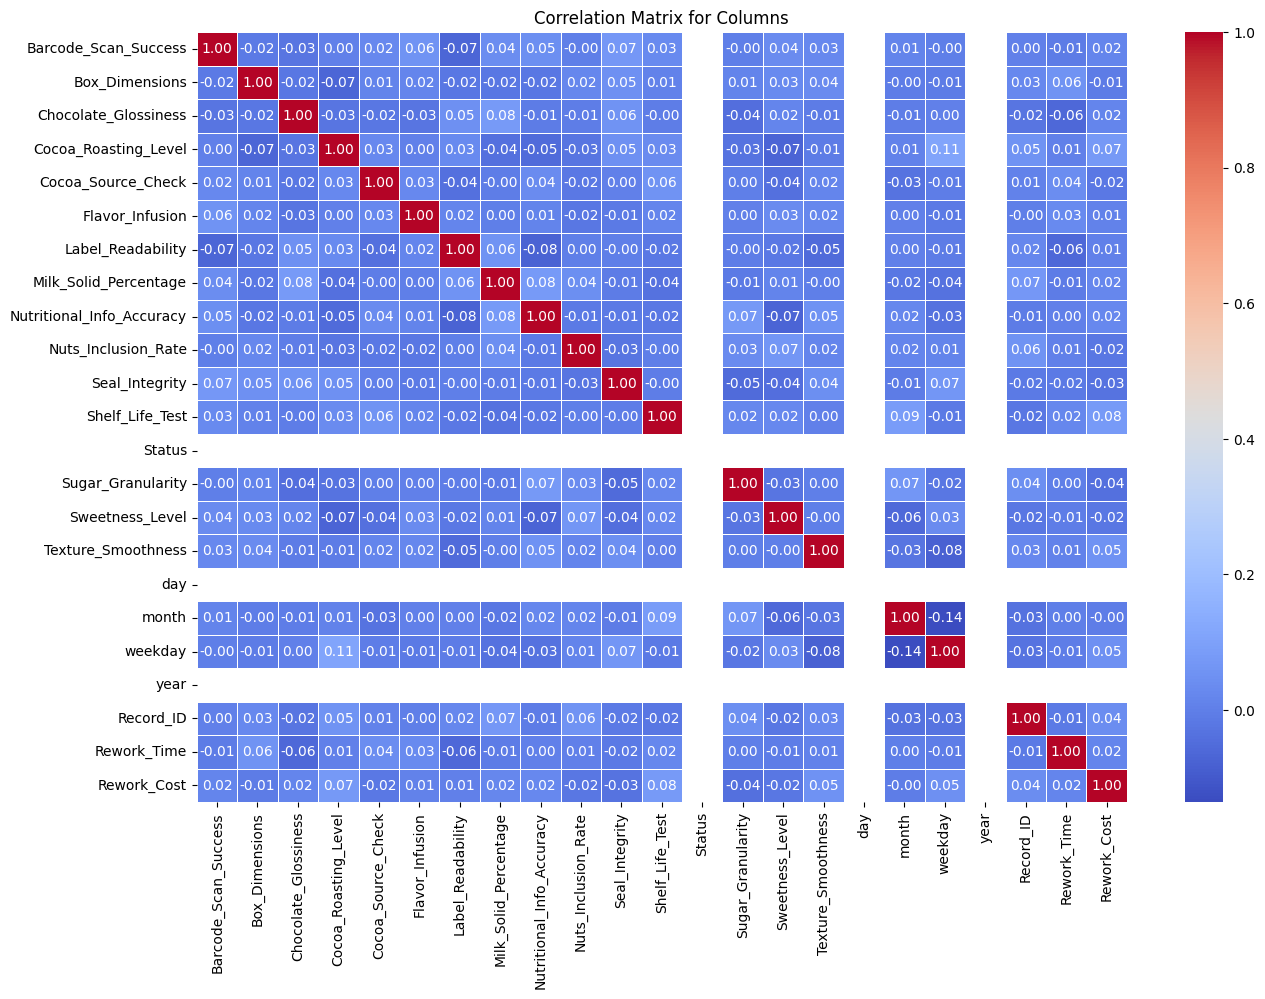

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns that are not 'DateTime' or 'Records_ID' for float transformation
cols_to_convert = merged_df.select_dtypes(include=['number']).columns.tolist()

# Assuming that 'Feature1' and 'Feature2' are the only numeric ones needed to be transformed
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Now calculate the correlation matrix for these numeric columns
correlation_matrix = merged_df[cols_to_convert].corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix for Columns')
plt.show()


In [66]:
import pandas as pd
# Select columns that are not 'DateTime' or 'Records_ID' for float transformation
cols_to_convert = merged_df.select_dtypes(include=['number']).columns.tolist()

# Assuming that 'Feature1' and 'Feature2' are the only numeric ones needed to be transformed
merged_df[cols_to_convert] = merged_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
# Assuming df is your DataFrame and 'col' is an array containing all column names
correlation_matrix = merged_df[cols_to_convert].corr('spearman')
print(correlation_matrix)

                           Barcode_Scan_Success  Box_Dimensions  \
Barcode_Scan_Success                   1.000000       -0.016382   
Box_Dimensions                        -0.016382        1.000000   
Chocolate_Glossiness                  -0.028094       -0.024131   
Cocoa_Roasting_Level                   0.043211       -0.066594   
Cocoa_Source_Check                     0.022341        0.007332   
Flavor_Infusion                        0.061647        0.018059   
Label_Readability                     -0.065604       -0.008939   
Milk_Solid_Percentage                  0.039142       -0.027358   
Nutritional_Info_Accuracy              0.041590       -0.020002   
Nuts_Inclusion_Rate                   -0.003477        0.025166   
Seal_Integrity                         0.065659        0.043899   
Shelf_Life_Test                        0.035886        0.005383   
Status                                      NaN             NaN   
Sugar_Granularity                     -0.000499        0.01770

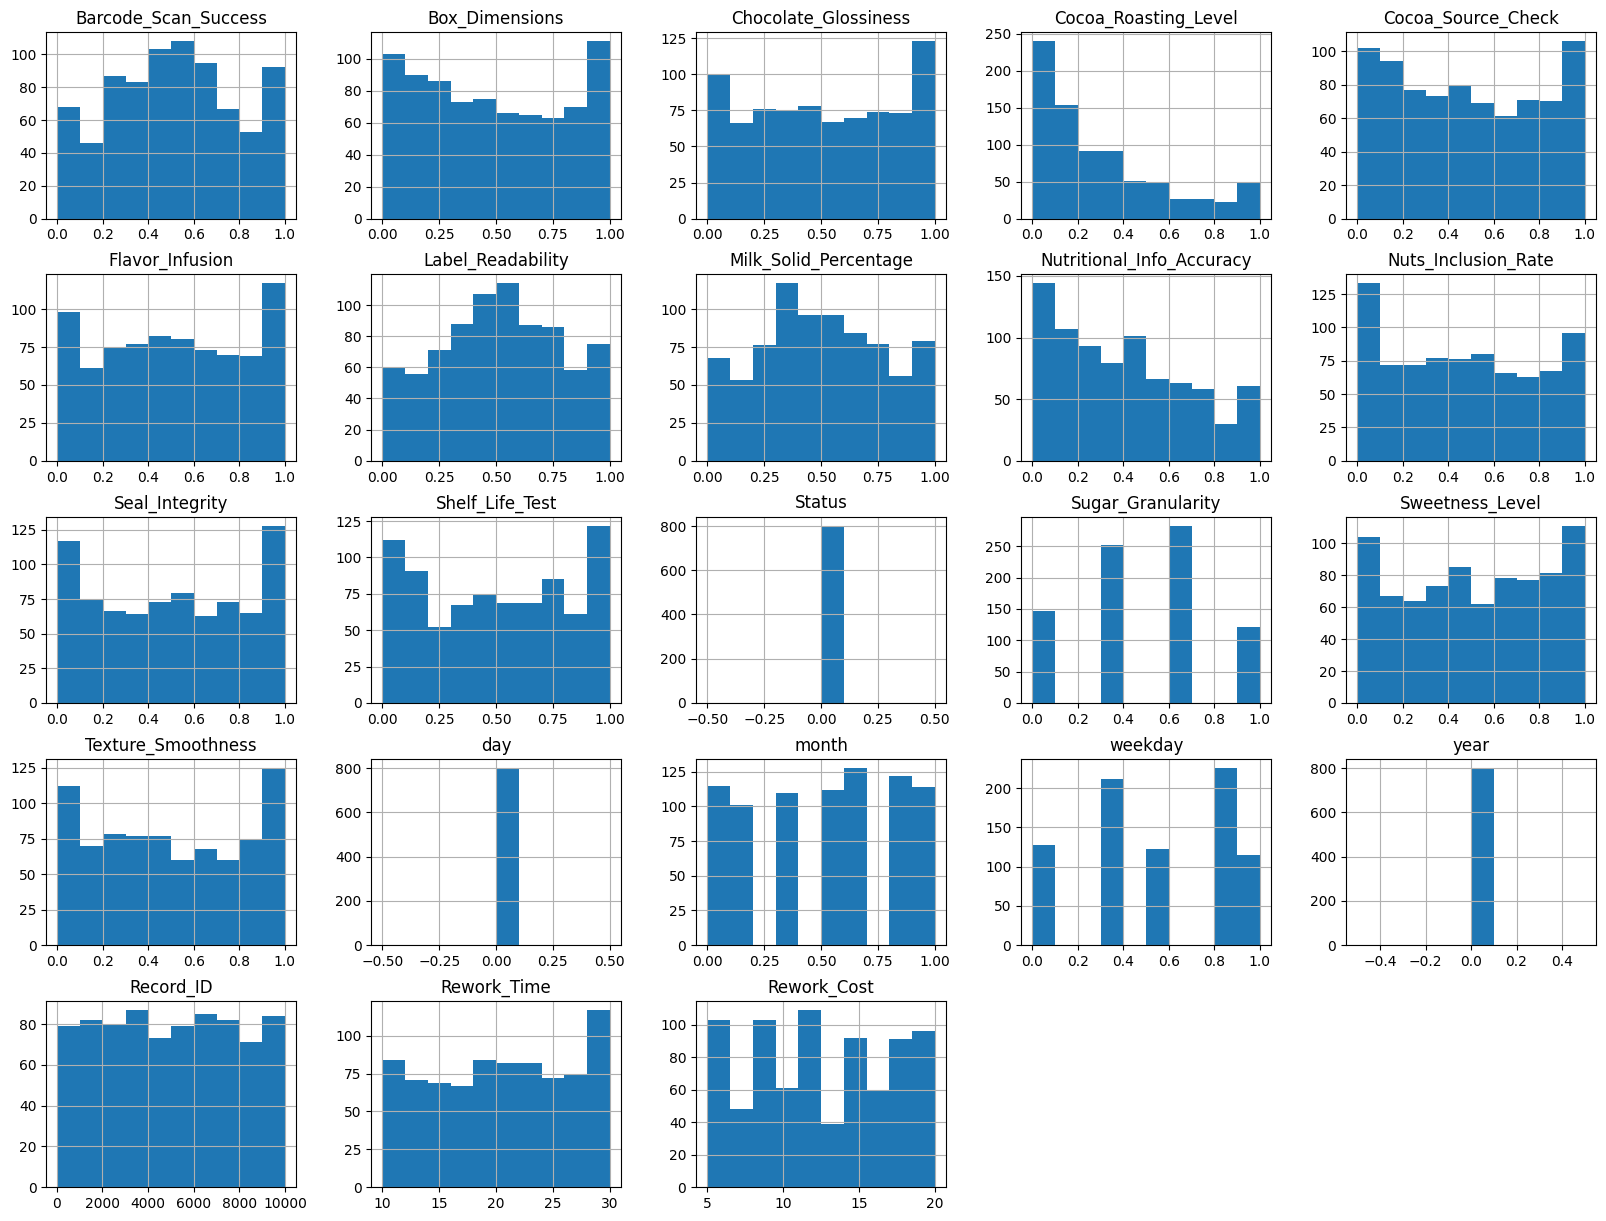

In [67]:
merged_df.hist(figsize=(20,15));

Best Random Forest: MSE train: 9.622, MSE test: 32.568
Ridge Regression: MSE train: 28.229, MSE test: 31.652
Lasso Regression: MSE train: 28.535, MSE test: 31.659


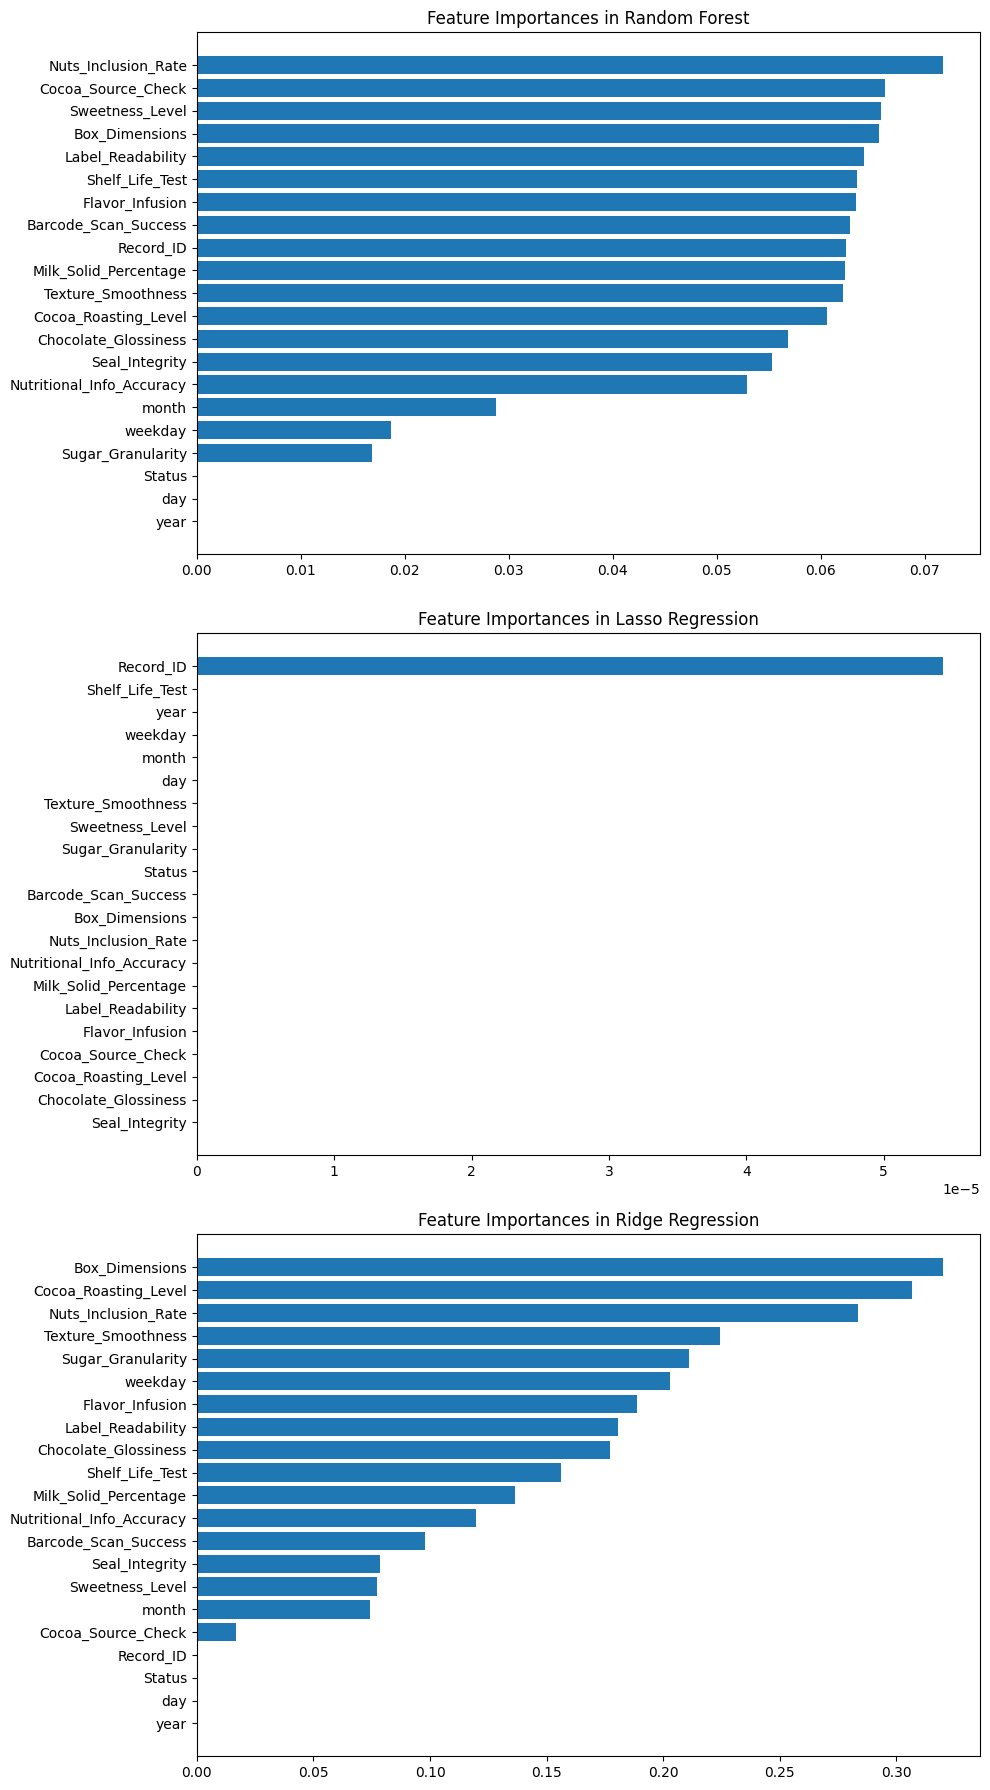

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



target = ['Rework_Cost', 'Rework_Time']
predictors = [col for col in merged_df.columns if col not in target]

X = merged_df[predictors]
y = merged_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor with GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Ridge and Lasso Regression with GridSearchCV
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate models
models = {
    'Best Random Forest': best_rf_model,
    'Ridge Regression': best_ridge_model,
    'Lasso Regression': best_lasso_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f'{name}: MSE train: {mse_train:.3f}, MSE test: {mse_test:.3f}')

# Feature Importances for Random Forest
feature_importances_rf = best_rf_model.feature_importances_
importance_df_rf = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Average the importances across targets for Lasso and Ridge
importance_df_lasso = pd.DataFrame({
    'Feature': predictors,
    'Importance': np.abs(best_lasso_model.coef_).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

importance_df_ridge = pd.DataFrame({
    'Feature': predictors,
    'Importance': np.abs(best_ridge_model.coef_).mean(axis=0)
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
fig, ax = plt.subplots(3, 1, figsize=(10, 18))
ax[0].barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
ax[0].set_title('Feature Importances in Random Forest')
ax[0].invert_yaxis()

ax[1].barh(importance_df_lasso['Feature'], importance_df_lasso['Importance'])
ax[1].set_title('Feature Importances in Lasso Regression')
ax[1].invert_yaxis()

ax[2].barh(importance_df_ridge['Feature'], importance_df_ridge['Importance'])
ax[2].set_title('Feature Importances in Ridge Regression')
ax[2].invert_yaxis()

plt.tight_layout()
plt.show()


Based on the graphs above the best one is Random forest


In [69]:
DFL = merged_df[['Rework_Cost', 'Label_Readability', 'Record_ID', 'Chocolate_Glossiness', 'Nuts_Inclusion_Rate', 'Cocoa_Roasting_Level', 'Cocoa_Source_Check', 'Box_Dimensions', 'Flavor_Infusion', 'month', 'weekday', 'Sugar_Granularity', 'Rework_Time'
]]


In [70]:
DFL2 = DFL.copy()

In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



target = ['Rework_Cost', 'Rework_Time']
predictors = [col for col in DFL.columns if col not in target]

X = DFL[predictors]
y = DFL[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor with GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Ridge and Lasso Regression with GridSearchCV
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}
lasso_param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
lasso_grid_search.fit(X_train, y_train)

best_ridge_model = ridge_grid_search.best_estimator_
best_lasso_model = lasso_grid_search.best_estimator_

# Evaluate models
models = {
    'Best Random Forest': best_rf_model,
    'Ridge Regression': best_ridge_model,
    'Lasso Regression': best_lasso_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    print(f'{name}: MSE train: {mse_train:.3f}, MSE test: {mse_test:.3f}')

Best Random Forest: MSE train: 13.722, MSE test: 32.724
Ridge Regression: MSE train: 28.302, MSE test: 31.713
Lasso Regression: MSE train: 28.535, MSE test: 31.659


In [72]:
from sklearn.model_selection import KFold
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

# Execute cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_scores = -scores  # Convert scores to positive MSE values
    rmse_scores = np.sqrt(mse_scores)  # Convert MSE to RMSE
    cv_results[name] = np.mean(rmse_scores)  # Store the average RMSE

# Print results
for model_name, avg_rmse in cv_results.items():
    print(f"{model_name} Average CV RMSE: {avg_rmse:.3f}")

Best Random Forest Average CV RMSE: 5.455
Ridge Regression Average CV RMSE: 5.374
Lasso Regression Average CV RMSE: 5.362


GridSearchCV itself performs cross-validation to evaluate different parameter combinations during the grid search process. However, this is focused on finding the best parameters.

Additional Cross-Validation: Performing additional cross-validation after selecting the best model parameters (like what you did) can help validate the stability and generalizability of the model across different subsets of data beyond the parameter tuning process. This is especially useful to check if the selected model is robust across various partitions of the data, not just those seen during the grid search.

In [73]:
predictions_df = pd.DataFrame(y_test_pred, columns=['Rework_Cost_Pred', 'Rework_Time_Pred'])
predictions_df.to_csv('model_predictionsCostTime.csv', index=False)

from google.colab import files
files.download('model_predictionsCostTime.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
print("Features used during model training:", DFL.columns.tolist())



Features used during model training: ['Rework_Cost', 'Label_Readability', 'Record_ID', 'Chocolate_Glossiness', 'Nuts_Inclusion_Rate', 'Cocoa_Roasting_Level', 'Cocoa_Source_Check', 'Box_Dimensions', 'Flavor_Infusion', 'month', 'weekday', 'Sugar_Granularity', 'Rework_Time']


In [75]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure the feature list excludes the target columns correctly
predictors = [col for col in DFL.columns if col not in ['Rework_Cost', 'Rework_Time']]

def simulate_scenario(X, model, scaler, target_index, feature_index=None, multiplier=None):
    X_copy = X.copy()  # Copy to avoid modifying the original data
    if feature_index is not None and multiplier is not None:
        X_copy.iloc[0, feature_index] *= multiplier  # Modify the specified feature by multiplying
    X_copy_scaled = scaler.transform(X_copy)  # Normalize the modified data
    predicted_value = model.predict(X_copy_scaled)[0, target_index]  # Predict rework cost/time
    return predicted_value

# Preparing the scaler based on the training data predictors
scaler = StandardScaler().fit(X_train[predictors])

# Assuming best_rf_model and best_ridge_model are already properly trained and the best estimators
X_simulation = X_test[predictors].iloc[:1]  # Use the first instance of the test data

# Multipliers for testing the effect of feature modification
multiplier_high = 1.2  # Example multiplier for high scenario
multiplier_low = 0.8   # Example multiplier for low scenario

# Initialize lists to store results
results = []

# Loop through all features to simulate scenarios
for feature_index, feature_name in enumerate(predictors):
    original = simulate_scenario(X_simulation, best_rf_model, scaler, target_index=0)
    high = simulate_scenario(X_simulation, best_rf_model, scaler, 0, feature_index, multiplier_high)
    low = simulate_scenario(X_simulation, best_rf_model, scaler, 0, feature_index, multiplier_low)

    # Store the results
    results.append({
        'Feature': feature_name,
        'Original Prediction': original,
        'High Multiplier Prediction': high,
        'Low Multiplier Prediction': low
    })

# Output results
for result in results:
    print(f"Feature: {result['Feature']}")
    print(f"Original Predicted Rework Cost: {result['Original Prediction']}")
    print(f"Predicted Rework Cost with Higher Feature Value (multiplied by {multiplier_high}): {result['High Multiplier Prediction']}")
    print(f"Predicted Rework Cost with Lower Feature Value (multiplied by {multiplier_low}): {result['Low Multiplier Prediction']}")
    print("---------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Feature: Label_Readability
Original Predicted Rework Cost: 12.53257085030982
Predicted Rework Cost with Higher Feature Value (multiplied by 1.2): 12.757883307460514
Predicted Rework Cost with Lower Feature Value (multiplied by 0.8): 12.53257085030982
---------------------------------------------------------
Feature: Record_ID
Original Predicted Rework Cost: 12.53257085030982
Predicted Rework Cost with Higher Feature Value (multiplied by 1.2): 12.53257085030982
Predicted Rework Cost with Lower Feature Value (multiplied by 0.8): 12.53257085030982
---------------------------------------------------------
Feature: Chocolate_Glossiness
Original Predicted Rework Cost: 12.53257085030982
Predicted Rework Cost with Higher Feature Value (multiplied by 1.2): 12.53257085030982
Predicted Rework Cost with Lower Feature Value (multiplied by 0.8): 12.48388937206584
---------------------------------------------------------
Feature: Nuts_Inclusion_Rate
Original Predicted Rework Cost: 12.53257085030982
P

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

In [76]:
# from google.colab import files
# df.to_excel('RecordStatus.xlsx', index=False)
# files.download('RecordStatus.xlsx')